# Partie 1

##  Etape 1 : Installation des librairies et chargement les données dans le notebook

###  Installation des librairies

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly
import plotly.express as px
import missingno as msno

print('Pandas : ' + pd.__version__)
print('numpy : ' + np.__version__)
print('matplotlib : ' + matplotlib.__version__)
print('seaborn : ' + sns.__version__)
print('plotly : ' + plotly.__version__)
print('missingno : ' + msno.__version__)


Pandas : 2.2.2
numpy : 1.26.4
matplotlib : 3.9.2
seaborn : 0.13.2
plotly : 5.24.1
missingno : 0.5.2


### Importation des fichiers

##### J'importe l'ensemble des 5 tables transmise dans le cadre de l'exercice

In [8]:
country_series_df = pd.read_csv("db_bm/EdStatsCountry-Series.csv")
country_df = pd.read_csv("db_bm/EdStatsCountry.csv")
data_df = pd.read_csv("db_bm/EdStatsData.csv")
footnote_df = pd.read_csv("db_bm/EdStatsFootNote.csv")
series_df = pd.read_csv("db_bm/EdStatsSeries.csv")

## Etape 2 : Collection des premières informations sur chaque jeu de données

##### Dans cette section, je prends connaissance de chaque dataframe et en extrait les informations générals : taille, noms des colonnes, type de donnée.  
J'identifie les doublons, s'il en existe, ainsi que la part des valeurs null.

###  series_df


#### Taille du jeu de données

In [13]:
taille = series_df.shape

In [14]:
print("La taille du jeu de données est de", taille[0], "lignes et", taille[1], "colonnes.")

La taille du jeu de données est de 3665 lignes et 21 colonnes.


####  Identification des doublons

In [16]:
doublon = series_df.duplicated().sum()

In [17]:
print("Il y a ", doublon ,"doublons dans le jeu de données")

Il y a  0 doublons dans le jeu de données


####  Identification et traitement des valeurs nulles

###### observation de la part des valeurs nulles par colonnes

<Axes: >

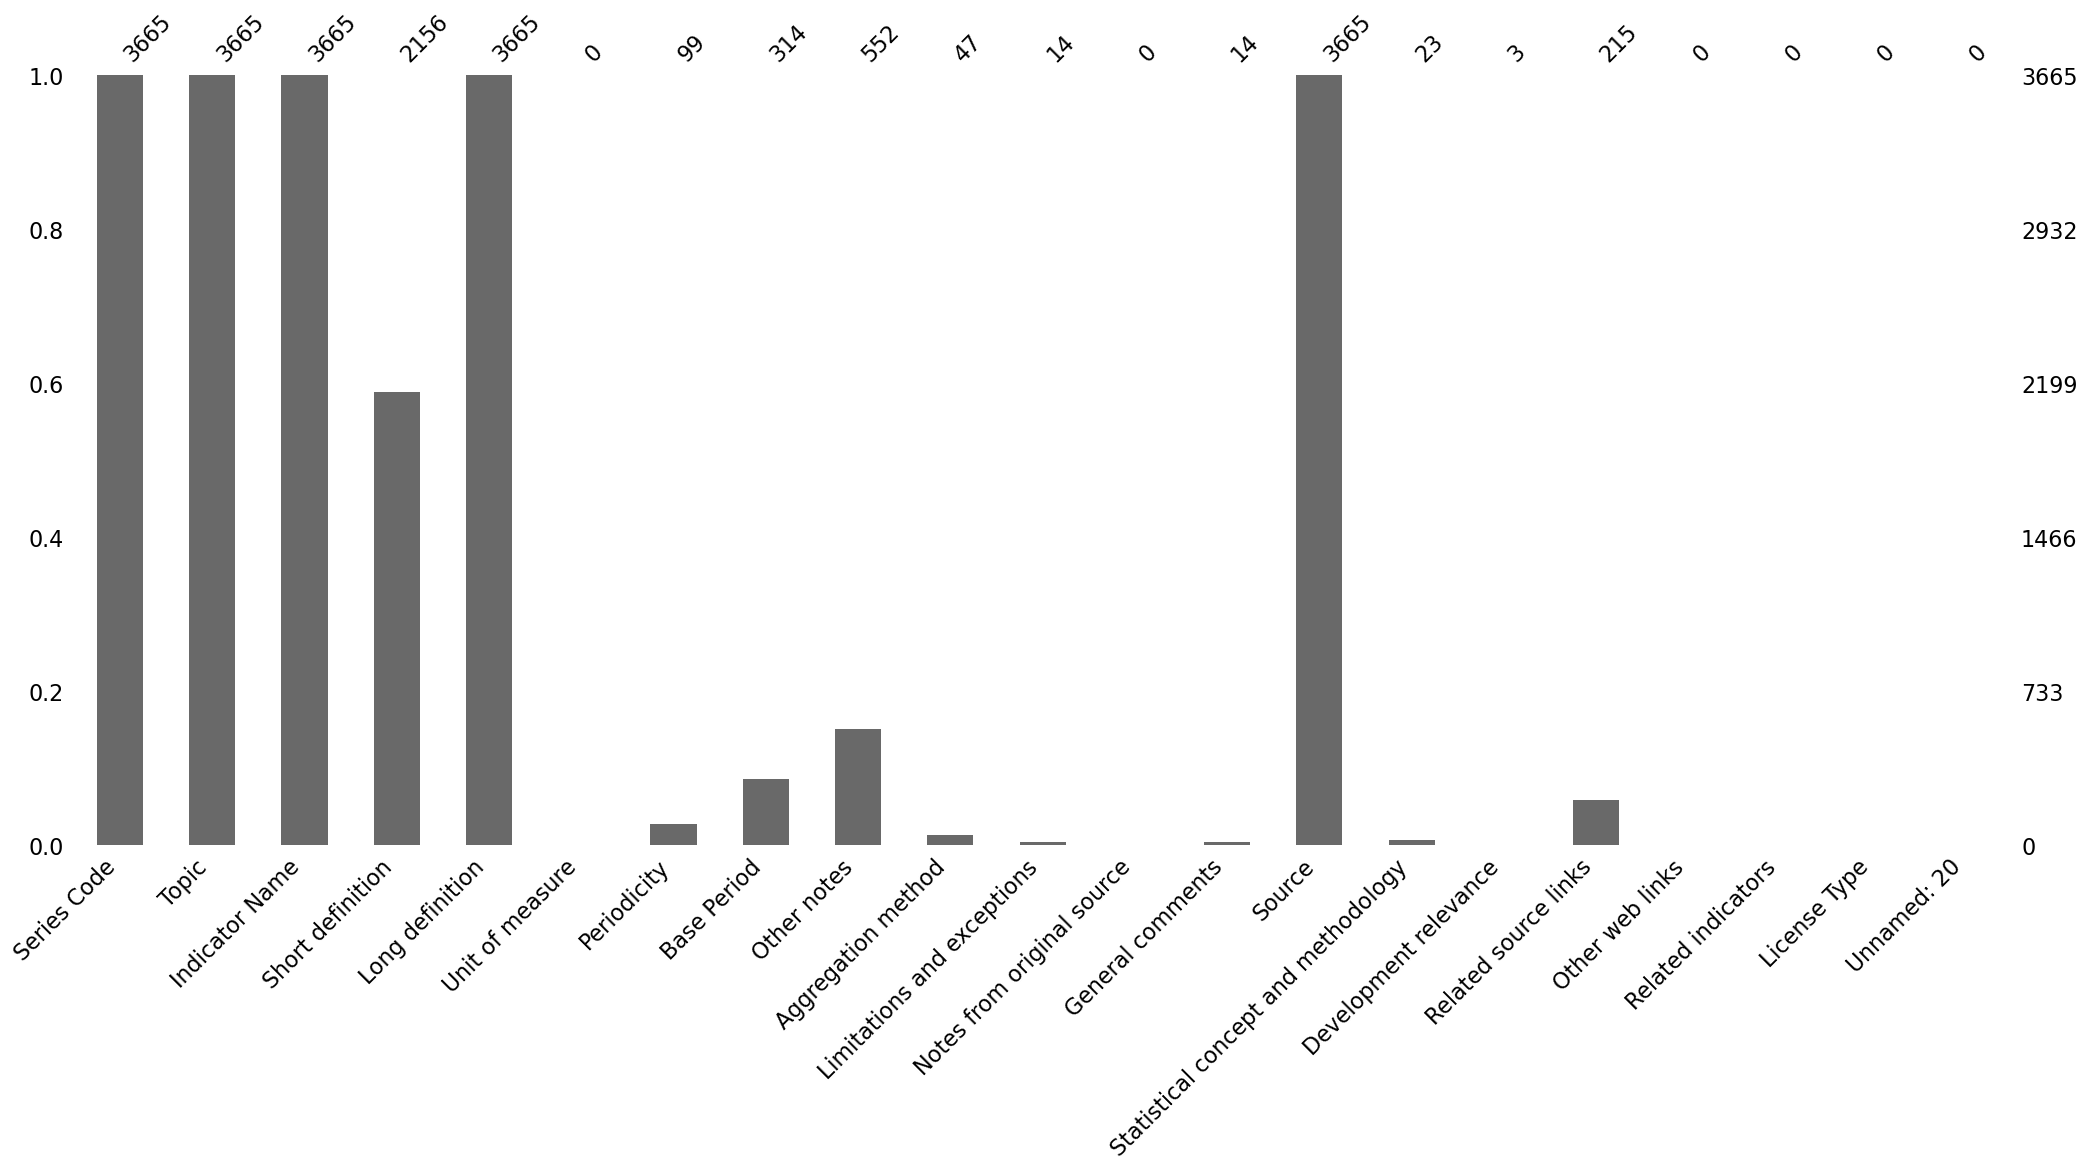

In [20]:
msno.bar(series_df)

In [21]:
columns_with_nulls = series_df.isnull().sum()
print((columns_with_nulls > 0).sum()," colonnes contiennent des valeurs manquantes")

16  colonnes contiennent des valeurs manquantes


###### Je supprime les colonnes avec plus de 30% de valeurs manquantes  
J'ai vérifié quelles ne sont pas indispensables à l'analyse de mon étude

In [23]:
threshold = 0.3  #seuil de 30 %
series_df_cleaned = series_df.loc[:, series_df.isnull().mean() < threshold]

In [24]:
print("Les colonnes concervés après avec supprimé les colonnes allant plus de 30% de valeurs manquantes sont:",series_df_cleaned.columns.tolist())

Les colonnes concervés après avec supprimé les colonnes allant plus de 30% de valeurs manquantes sont: ['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source']


##### Analyse par type de données

###### J'identifie les types de données grace à .dtypes

In [27]:
series_df_cleaned.dtypes

Series Code        object
Topic              object
Indicator Name     object
Long definition    object
Source             object
dtype: object

In [28]:
print("Les colonnes ont des données de type object (catégorielle) :\n")
print(series_df_cleaned.select_dtypes(include='object').columns.tolist())

print("\nLes colonnes ont des données de type float (numérique) :\n")
print(series_df_cleaned.select_dtypes(include='float64').columns.tolist())

Les colonnes ont des données de type object (catégorielle) :

['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source']

Les colonnes ont des données de type float (numérique) :

[]


######  2.1.4.2 J'utilise value_counts() pour les  valeurs catégorielles (objet)

###### - J'observe les occurrences des series

In [31]:
series_df['Series Code'].value_counts()

Series Code
BAR.NOED.1519.FE.ZS            1
SP.POP.0710.FE.UN              1
SP.POP.0710.TO.UN              1
SP.POP.0711.FE.UN              1
SP.POP.0711.MA.UN              1
                              ..
LO.PASEC.MAT5.LO.MA            1
LO.PASEC.MAT5.MA               1
LO.PASEC.REA.2                 1
LO.PASEC.REA.2.FE              1
XGDP.56.FSGOV.FDINSTADM.FFD    1
Name: count, Length: 3665, dtype: int64

###### chaque ligne corresponds à une série

###### - J'observe les occurrences des categories

In [34]:
df_counts_topic = series_df['Topic'].value_counts().reset_index()

In [35]:
df_counts_topic

Topic  count
0                                   Learning Outcomes   1046
1                                          Attainment    733
2                                  Education Equality    426
3                                           Secondary    256
4                                             Primary    248
5                                          Population    213
6                                            Tertiary    158
7                                            Teachers    137
8                                        Expenditures     93
9                 Engaging the Private Sector (SABER)     51
10                                           Literacy     32
11                                   Teachers (SABER)     29
12         School Autonomy and Accountability (SABER)     29
13                          Early Childhood Education     24
14   Education Management Information Systems (SABER)     23
15                        Post-Secondary/Non-Tertiary     19
16                             School Finance (SABER)     18
17                         Tertiary Education (SABER)     17
18                         Student Assessment (SABER)     15
19                                        Pre-Primary     14
20                      Health: Population: Structure     13
21                      Workforce Development (SABER)     12
22                    Early Child Development (SABER)     12
23   Social Protection & Labor: Labor force structure     11
24           School Health and School Feeding (SABER)      9
25    Economic Policy & Debt: Purchasing power parity      6
26                                              Laber      3
27            Social Protection & Labor: Unemployment      3
28  Economic Policy & Debt: National accounts: US$...      3
29  Economic Policy & Debt: National accounts: US$...      2
30                                         Background      2
31                     Infrastructure: Communications      2
32                                               EMIS      2
33  Economic Policy & Debt: National accounts: Atl...      1
34                               Health: Risk factors      1
35                                  Health: Mortality      1
36                       Health: Population: Dynamics      1

###### Les principales catégories présentés dans la table sont les suivantes : 

In [37]:
df_top10 = df_counts_topic.head(10)

fig = px.bar(df_top10, 
             x='Topic', 
             y='count', 
             title="Nombre d'indicateur par topic - Top 10 des topic")  # maxnumber limite le nombre de catégories affichées, le reste va dans "Others"
fig.show()


In [38]:
print("Les topics les plus représentés sont", df_top10['Topic'].tolist())

Les topics les plus représentés sont ['Learning Outcomes', 'Attainment', 'Education Equality', 'Secondary', 'Primary', 'Population', 'Tertiary', 'Teachers', 'Expenditures', 'Engaging the Private Sector (SABER)']


#### Conclusion de l'exploration nettoyage de la table series_df
La df Series donne des informations sur les indicateurs (noms, définitions, sources...)  
Elle a pour clé primaire les indicateurs (colonnes indicator Name / series codes).  
Les indicateurs sont classés par topic. Le topic avec le plus d'indicateur est "learning outcomes"
Il n'y a pas de duplicate.  
Les colonnes avec +30% de valeurs nulles ont été écartés.  
Il reste donc les colonnes suivantes : Series Code,	Topic,	Indicator Name,	Long definition, Source  
Pour notre étude de marchés de développement d'une école en ligne, les informations qui nous interessent sont concervées (définition des indicateurs).

In [40]:
print("La taille du jeu de données avant nettoyage est de", series_df.shape[0], "lignes et", series_df.shape[1], "colonnes.")
print("La taille du jeu de données après nettoyage est de", series_df_cleaned.shape[0], "lignes et", series_df_cleaned.shape[1], "colonnes.")

La taille du jeu de données avant nettoyage est de 3665 lignes et 21 colonnes.
La taille du jeu de données après nettoyage est de 3665 lignes et 5 colonnes.


###  data_df

####  Taille du jeu de données  

In [43]:
print("La taille du jeu de données est de", data_df.shape[0], "lignes et", data_df.shape[1], "colonnes.")

La taille du jeu de données est de 418208 lignes et 70 colonnes.


#### Identification des valeurs nulles

In [45]:
doublon = data_df.duplicated().sum()

In [46]:
print("Il y a ", doublon ,"doublons dans le jeu de données")

Il y a  0 doublons dans le jeu de données


#### Identification et traitement des valeurs nulles

<Axes: >

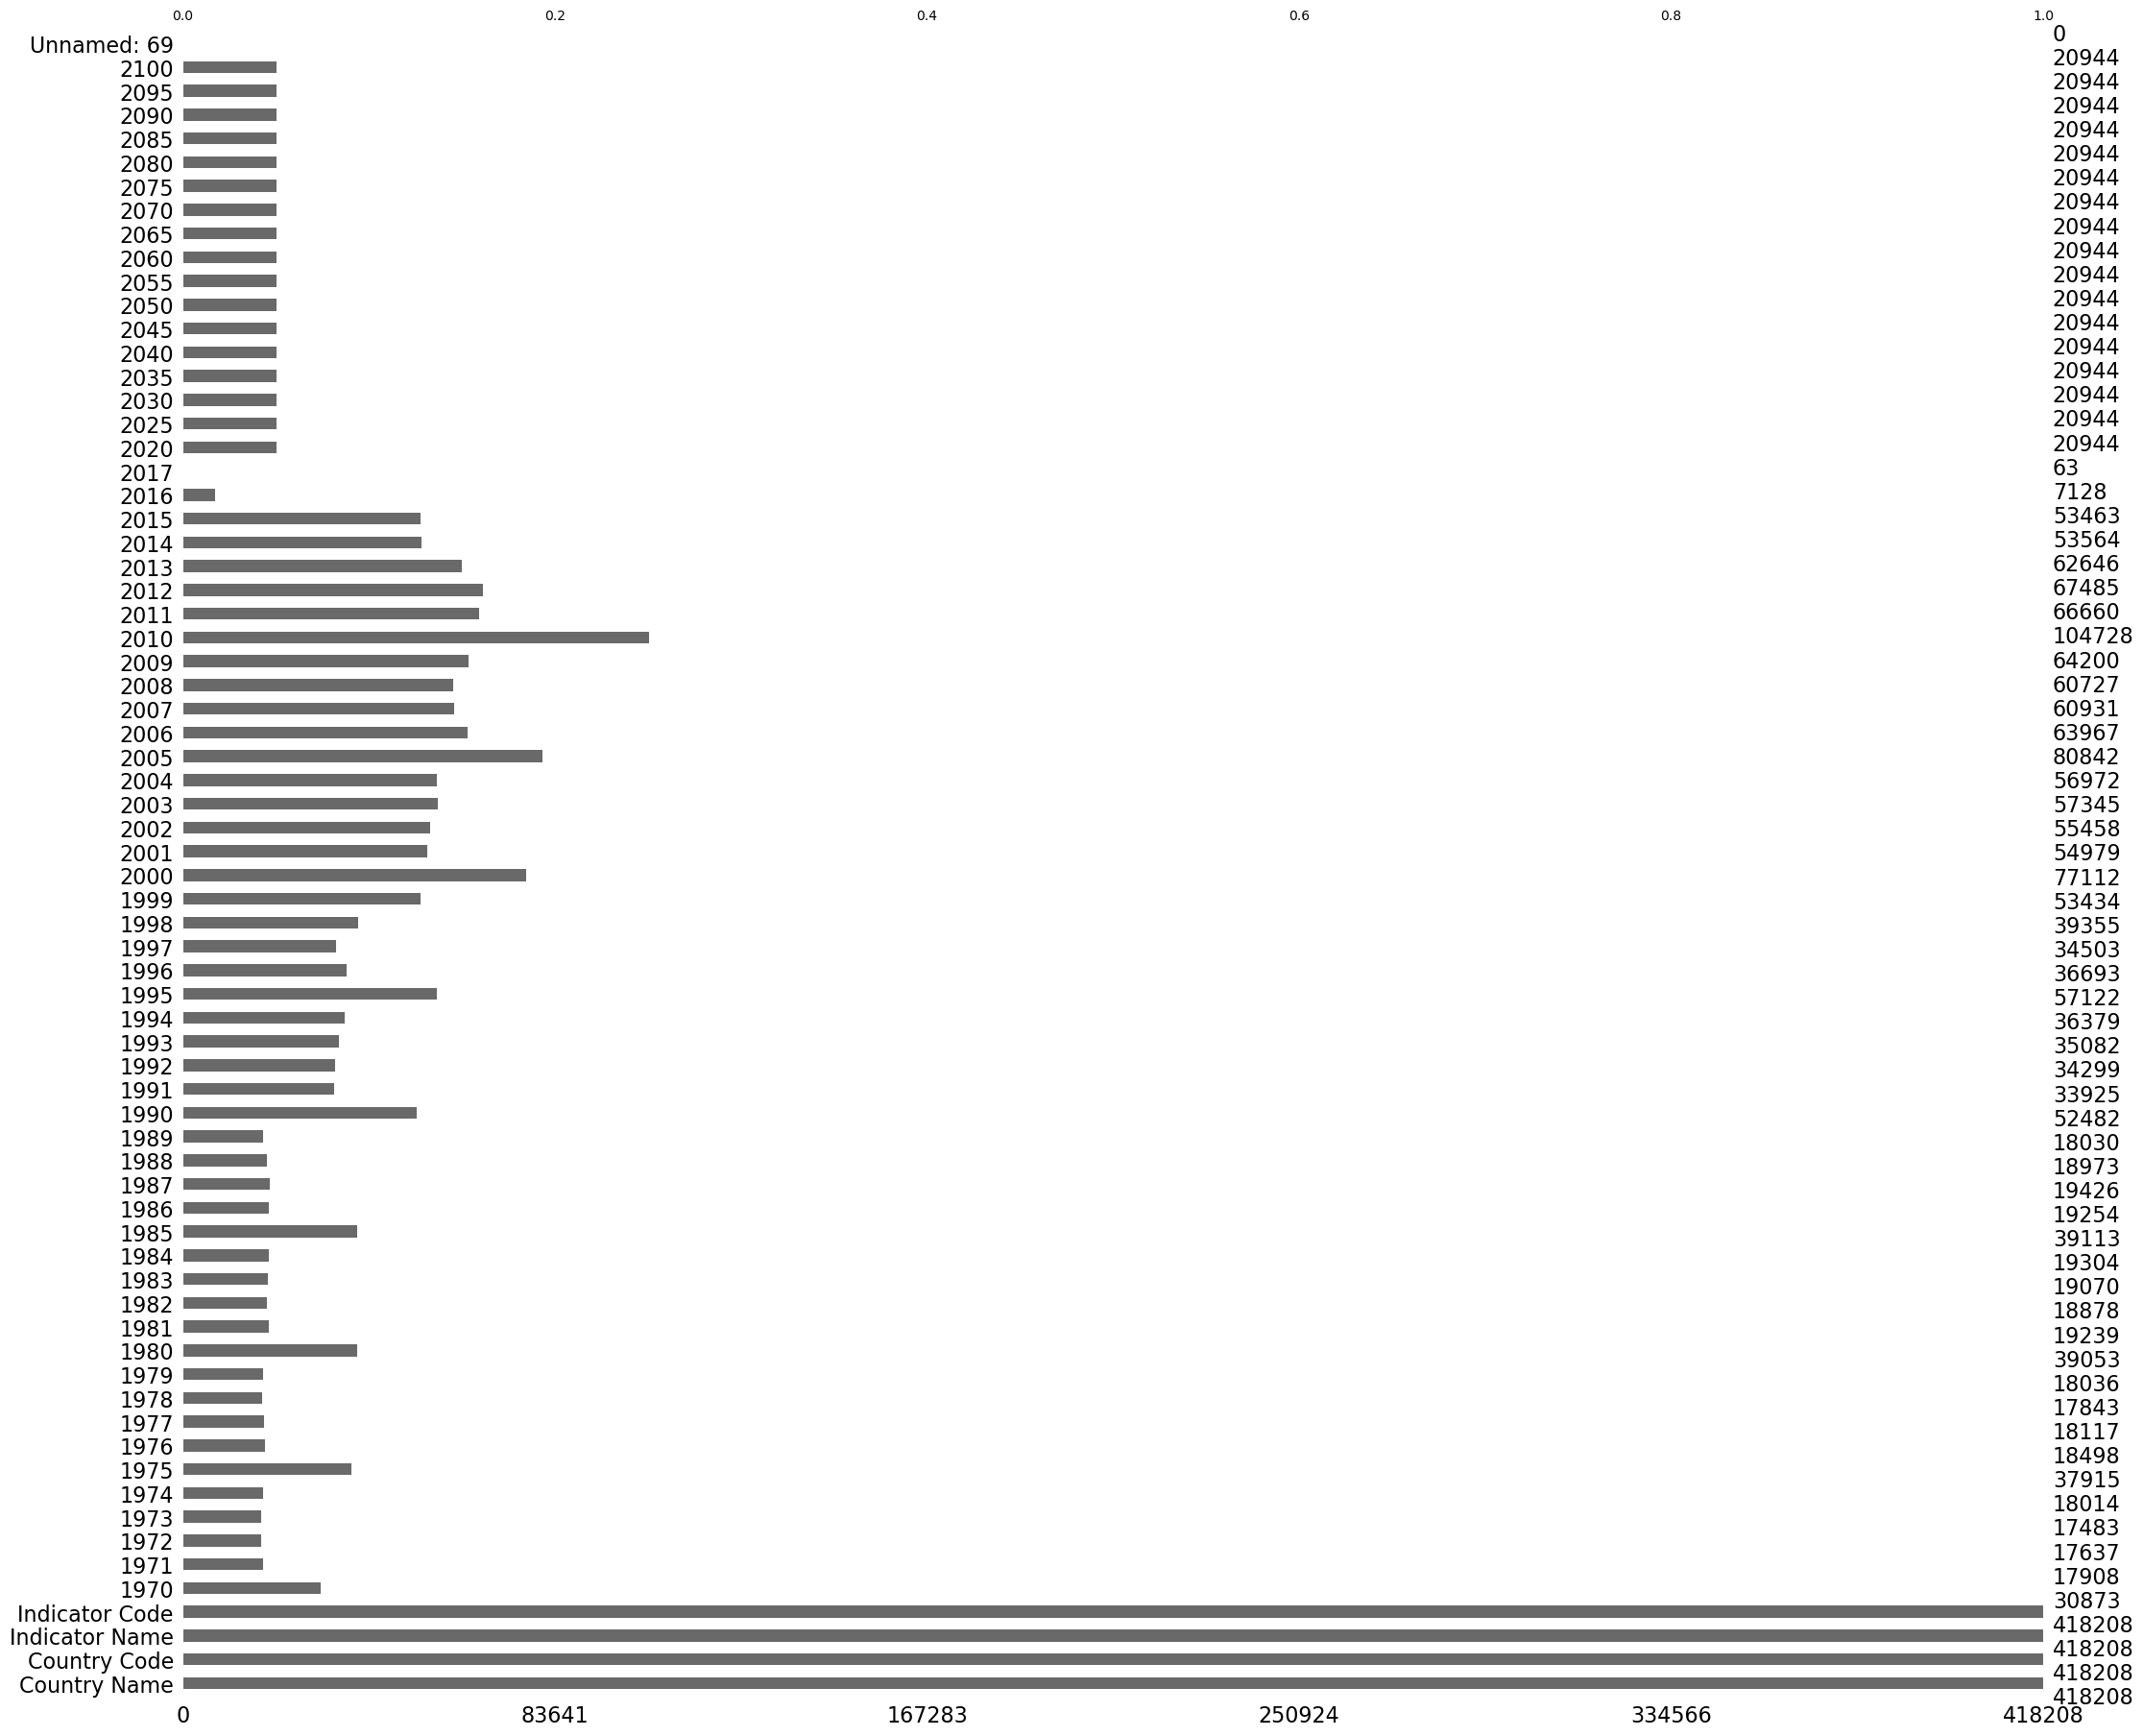

In [48]:
msno.bar(data_df)

###### la table data_df nous donne des informations sur les résultats des indicateurs par années.  
On observe un grand nombre de valeurs manquantes, en particulier dans les colonnes annuelles (plus de 70 %).  
Malgré cela, ces données restent essentielles pour notre étude et ne peuvent pas être écartées.   
On remarque que l'année 2017 est vide et que les valeurs les plus complètes sont entre 2000 et 2015.  
Ces éléments seront déterminants pour définir le périmètre d’analyse des indicateurs.

Les données après 2020 correspondent à des projections. 

###### - je supprime l'année sans valeur

In [51]:
threshold = 1  #seuil de 100 %
data_df_cleaned = data_df.loc[:, data_df.isnull().mean() < threshold]

In [52]:
print("Les colonnes concervés après avec supprimé les colonnes allant 100% de valeurs manquantes sont:",data_df_cleaned.columns.tolist())

Les colonnes concervés après avec supprimé les colonnes allant 100% de valeurs manquantes sont: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']


#### Analyse par type de données

##### J'identifie les types de données grace à .dtypes

In [55]:
data_df_cleaned.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2080              float64
2085              float64
2090              float64
2095              float64
2100              float64
Length: 69, dtype: object

In [56]:
print("Les colonnes ont des données de type object (catégorielle) :\n")
print(data_df_cleaned.select_dtypes(include='object').columns.tolist())

print("\nLes colonnes ont des données de type float (numérique) :\n")
print(data_df_cleaned.select_dtypes(include='float64').columns.tolist())

Les colonnes ont des données de type object (catégorielle) :

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

Les colonnes ont des données de type float (numérique) :

['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']


##### Analyse des valeurs catégorielles (objet)

In [58]:
nbr_countries=data_df_cleaned['Country Name'].nunique()
nbr_indicator= data_df_cleaned['Indicator Name'].nunique()

In [59]:
print("La table data_df rassemble des informations sur", nbr_countries,"pays différents")
print("La table data_df contitien des informations sur",nbr_indicator,"indicateurs differents")

La table data_df rassemble des informations sur 115 pays différents
La table data_df contitien des informations sur 3665 indicateurs differents


##### Analyse des valeurs numériques (float)

###### les colonnes de type float correspondent aux années (ex. : 1970, 1995, 2020…)  
Chaque colonne représente une valeur chiffrée d’un indicateur pour un pays donné, sur une année précise.  
Pour l'heure, faire une analyse statistique globale (moyenne, écart-type, etc.) sur ces colonnes n’a pas de sens directement car :  
Les colonnes ne représentent pas des variables indépendantes mais des mesures temporelles.   
Chaque valeur dépend du pays, de l’indicateur.

#### Conclusion de l'exploration et le nettoyage de la table data_df
La table data_df contient les résultats des indicateurs par pays.  
Chaque ligne de la table correspond à un couple unique Indicateur / Pays.  
Les colonnes annuelles vont de 1970 à 2100, incluant des projections pour les années futures.  

Concernant le nettoyage :  
Aucun doublon n’a été détecté.  
La colonne correspondant à l’année 2017, vide à 100 %, a été supprimée.  
Bien que de nombreuses colonnes présentent environ 70 % de valeurs manquantes, elles ont été conservées car elles sont essentielles pour la suite de l’analyse.  


In [63]:
print("La taille du jeu de données avant nettoyage est de", data_df.shape[0], "lignes et", data_df.shape[1], "colonnes.")
print("La taille du jeu de données après nettoyage est de", data_df_cleaned.shape[0], "lignes et", data_df_cleaned.shape[1], "colonnes.")

La taille du jeu de données avant nettoyage est de 418208 lignes et 70 colonnes.
La taille du jeu de données après nettoyage est de 418208 lignes et 69 colonnes.


### country_series_df

#### Taille du jeu de données

In [66]:
taille = country_series_df.shape

In [67]:
print("La taille du jeu de données est de", taille[0], "lignes et", taille[1], "colonnes.")

La taille du jeu de données est de 613 lignes et 4 colonnes.


#### Identification des doublons

In [69]:
doublon = country_series_df.duplicated().sum()

In [70]:
print("Il y a ", doublon ,"doublons dans le jeu de données")

Il y a  0 doublons dans le jeu de données


#### Identification et traitement des valeurs nulles

<Axes: >

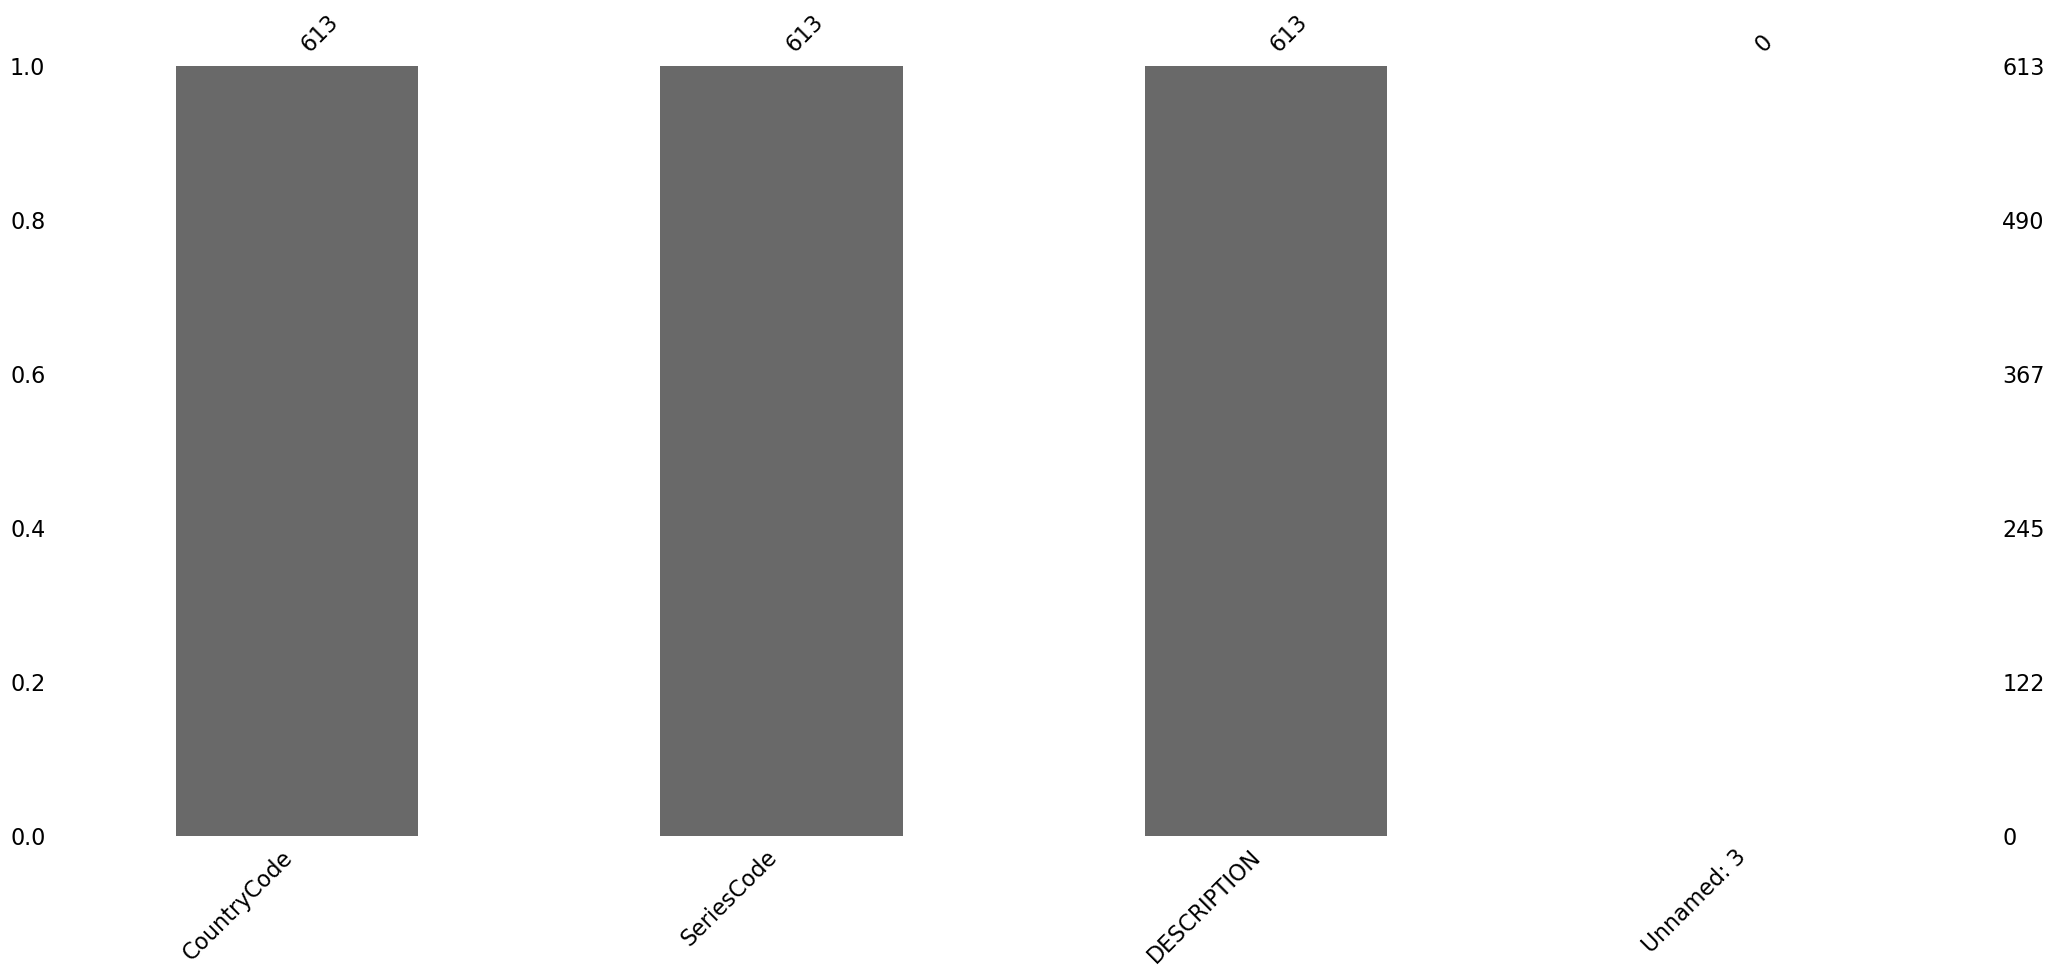

In [72]:
msno.bar(country_series_df)

In [73]:
columns_with_nulls = country_series_df.isnull().sum()
print((columns_with_nulls > 0).sum()," colonnes contiennent des valeurs manquantes")

1  colonnes contiennent des valeurs manquantes


###### La colonne unamed est vide. les autres n'ont pas de valeurs manquantes  
Je supprime la colonne vide.

In [75]:

country_series_df_cleaned=country_series_df.drop(columns=['Unnamed: 3'])
country_series_df_cleaned


CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  
0    Data sources : United Nations World Population...  
1    Data sources: United Nations World Population ...  
2    Data sources: United Nations World Population ...  
3                   Estimates are based on regression.  
4    Data sources : United Nations World Population...  
..                                                 ...  
608  Data sources : Statistics South Africa, United...  
609  Data sources: United Nations World Population ...  
610  Data sources : United Nations World Population...  
611  Data sources : United Nations World Population...  
612  Data sources: United Nations World Population ...  

[613 rows x 3 columns]

In [76]:
print("Les colonnes conservées après avoir supprimé les colonnes vides sont :", country_series_df_cleaned.columns.tolist())

Les colonnes conservées après avoir supprimé les colonnes vides sont : ['CountryCode', 'SeriesCode', 'DESCRIPTION']


##### 2.3.4 Analyse par type de données

###### 2.3.4.1 J'identifie les types de données grace à .dtypes

In [79]:
country_series_df_cleaned.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

###### 2.3.4.2 J'analyse les valeurs catégorielles (objet)

In [81]:
nbr_countries=country_series_df_cleaned['CountryCode'].nunique()


In [82]:
print("La table country_series_cleaned_df rassemble des informations sur", nbr_countries,"pays différents")

La table country_series_cleaned_df rassemble des informations sur 211 pays différents


In [83]:
country_series_df_cleaned['CountryCode'].value_counts()

CountryCode
MDA    18
GEO    18
CYP    12
SRB    12
MUS    12
       ..
GRL     2
GTM     2
GUM     2
HKG     2
ZWE     2
Name: count, Length: 211, dtype: int64

###### La table nous apprends chaque pays est lié à un certain nombre de séries (indicateurs) allant de 18 à 2. 

###### - J'observe les occurences des SeriesCode

In [86]:
country_series_df_cleaned['SeriesCode'].value_counts()

SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

###### Tous les series/indicateurs ne sont pas disponibles pour tous les pays.  
Certains sont très complets (SP.POP.TOTL, SP.POP.GROW), d'autres moins.

##### Conclusion de l'exploration et le nettoyage de la table country_series_df
La table country_series nous indique quel serie sont disponible pour quel pays, et les data sources de chacune des series.  

Chaque ligne de la table correspond à un couple unique series / pays.  

Tous les series/indicateurs ne sont pas disponibles pour tous les pays.

Concernant le nettoyage :
Aucun doublon n’a été détecté.
Une colonne (Unamed : 3 ) vide à 100 %, a été supprimée.

In [89]:
print("La taille du jeu de données avant nettoyage est de", country_series_df.shape[0], "lignes et", country_series_df.shape[1], "colonnes.")
print("La taille du jeu de données après nettoyage est de", country_series_df_cleaned.shape[0], "lignes et", country_series_df_cleaned.shape[1], "colonnes.")

La taille du jeu de données avant nettoyage est de 613 lignes et 4 colonnes.
La taille du jeu de données après nettoyage est de 613 lignes et 3 colonnes.


### country_df

#### Taille du jeu de données

In [92]:
taille = country_df.shape

In [93]:
print("La taille du jeu de données est de", taille[0], "lignes et", taille[1], "colonnes.")

La taille du jeu de données est de 241 lignes et 32 colonnes.


#### Identification des doublons

In [95]:
doublon = country_df.duplicated().sum()

In [96]:
print("Il y a ", doublon ,"doublons dans le jeu de données")

Il y a  0 doublons dans le jeu de données


#### Identification et traitement des valeurs nulles

<Axes: >

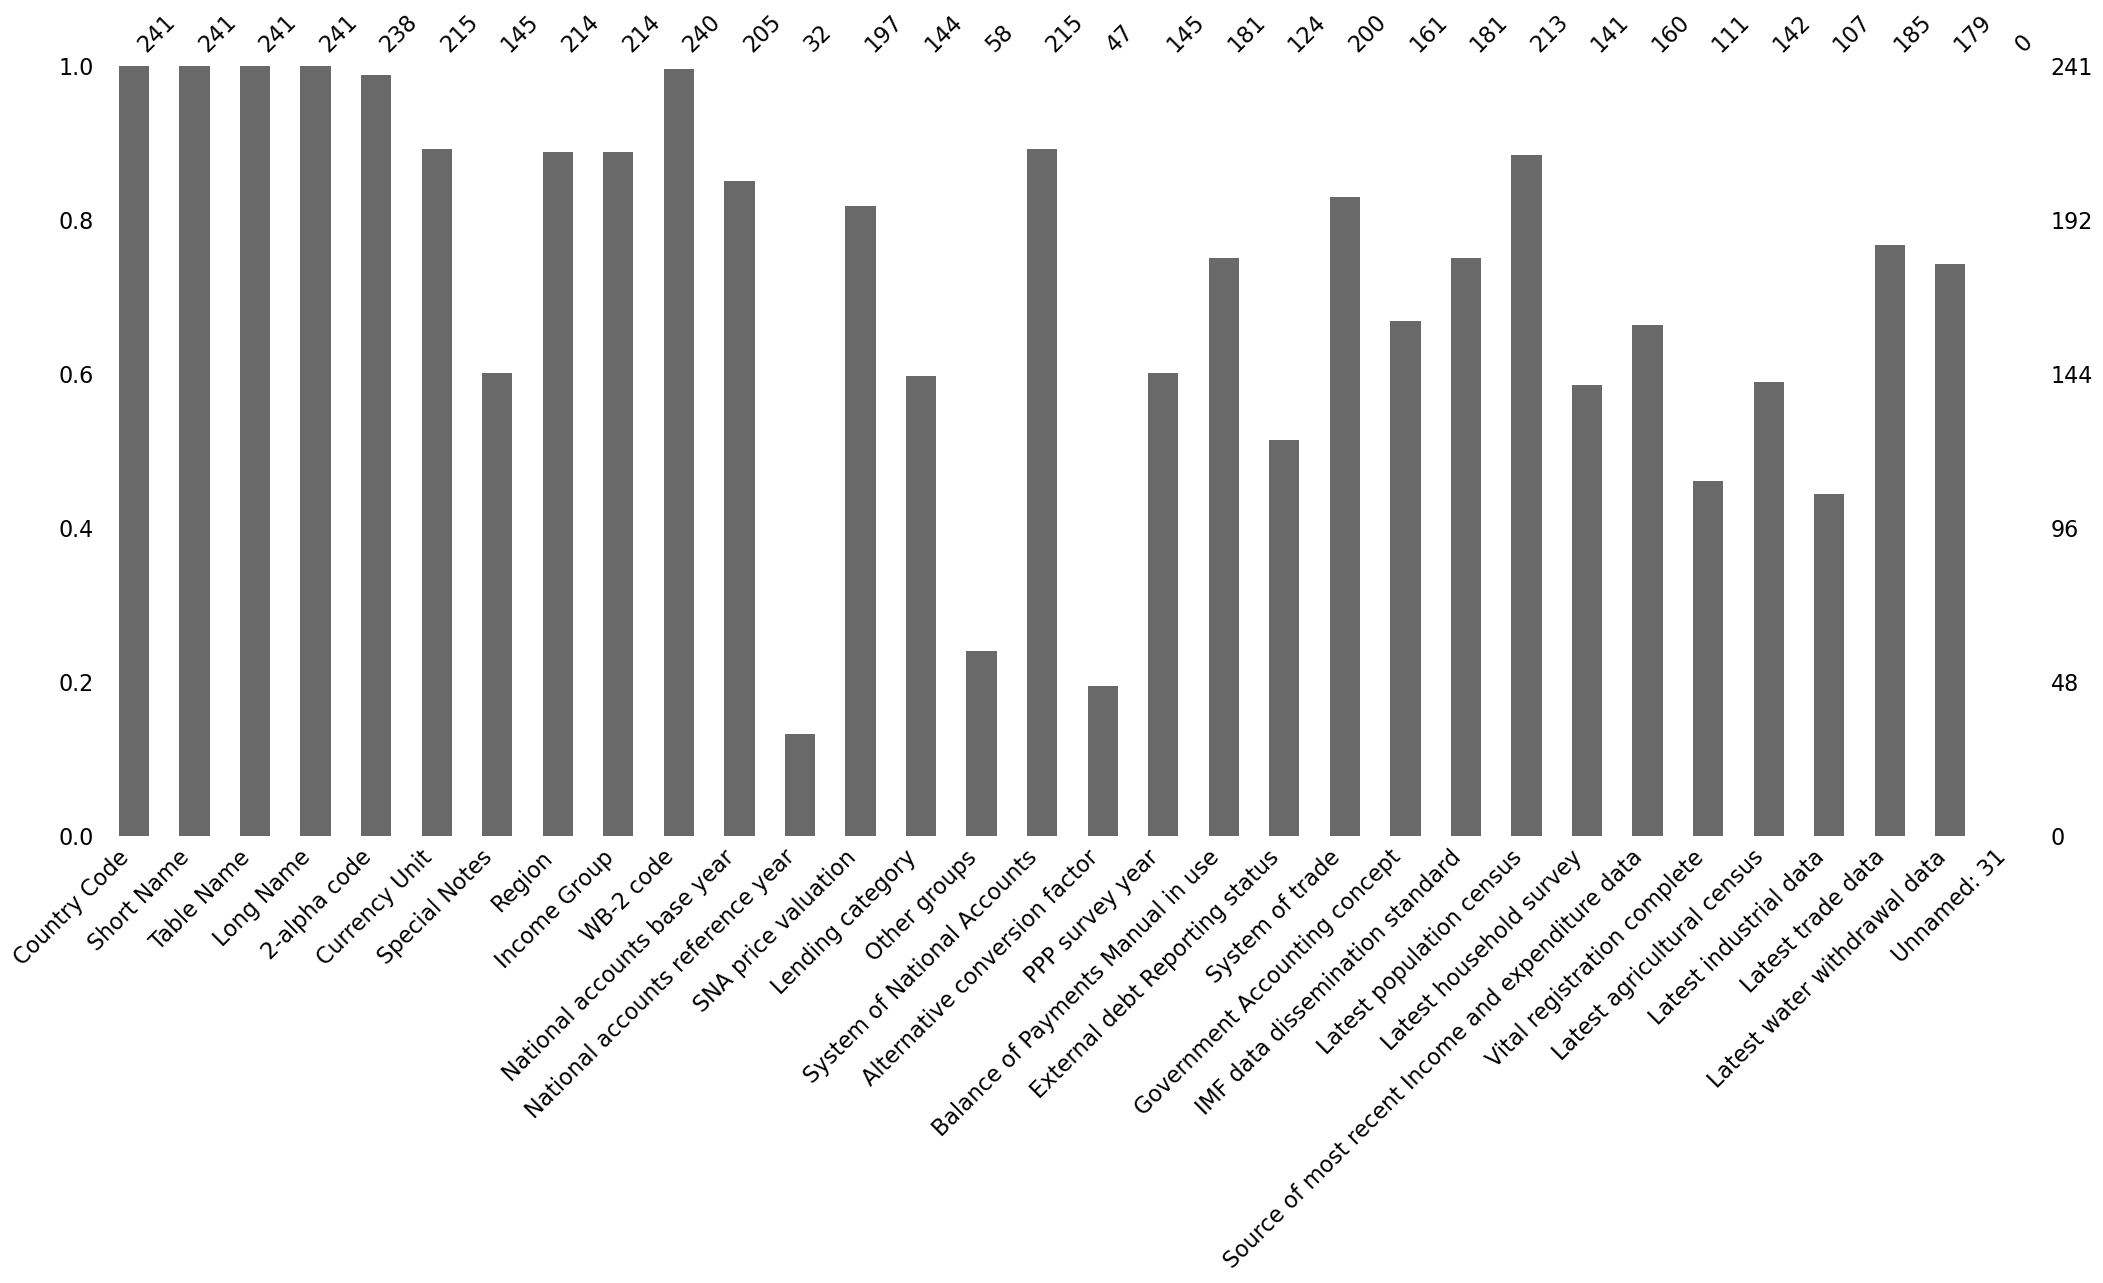

In [98]:
msno.bar(country_df)

In [99]:
columns_with_nulls = country_df.isnull().sum()
print((columns_with_nulls > 0).sum()," colonnes contiennent des valeurs manquantes")

28  colonnes contiennent des valeurs manquantes


###### Je supprime les colonnes avec plus de 30% de valeurs manquantes  
J'ai vérifié quelles ne sont pas indispensables à l'analyse de mon étude

In [101]:
threshold = 0.30
country_df_cleaned = country_df.loc[:, country_df.isnull().mean() < threshold]

In [102]:
print("Les colonnes concervés après avec supprimé les colonnes allant plus de 30% de valeurs manquantes sont:",country_df_cleaned.columns.tolist())

Les colonnes concervés après avec supprimé les colonnes allant plus de 30% de valeurs manquantes sont: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'SNA price valuation', 'System of National Accounts', 'Balance of Payments Manual in use', 'System of trade', 'IMF data dissemination standard', 'Latest population census', 'Latest trade data', 'Latest water withdrawal data']


#### Visualisation des groupes de pays par région et income 

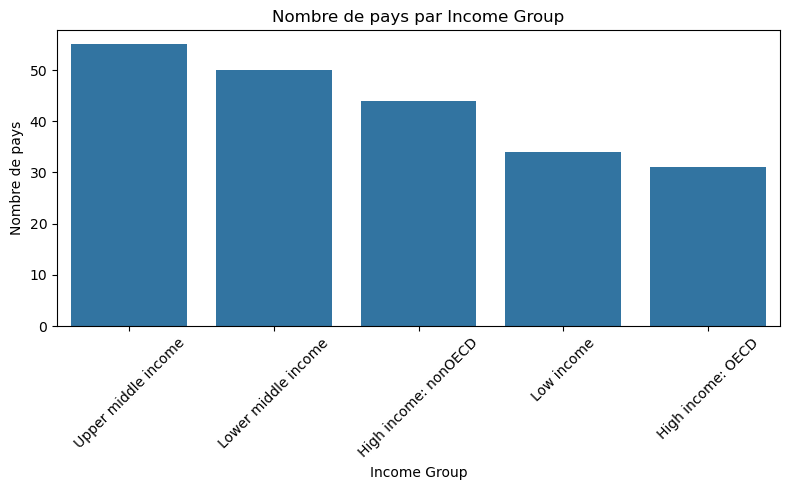

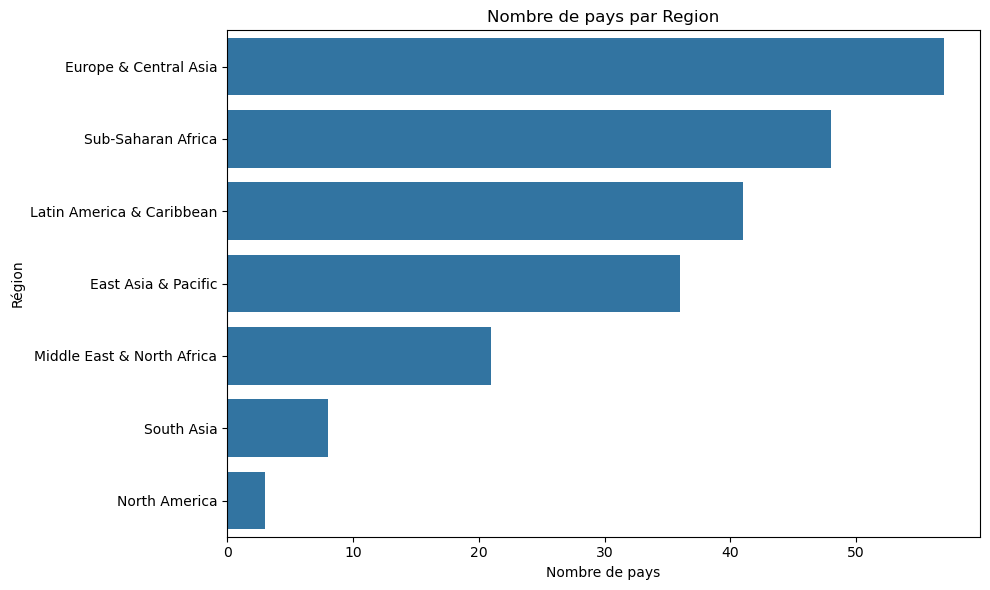

In [676]:
# Nombre de pays par Income Group
plt.figure(figsize=(8,5))
sns.countplot(data=country_df, x='Income Group', order=country_df['Income Group'].value_counts().index)
plt.title("Nombre de pays par Income Group")
plt.xticks(rotation=45)
plt.ylabel("Nombre de pays")
plt.tight_layout()
plt.show()

# Nombre de pays par Region
plt.figure(figsize=(10,6))
sns.countplot(data=country_df, y='Region', order=country_df['Region'].value_counts().index)
plt.title("Nombre de pays par Region")
plt.ylabel("Région")
plt.xlabel("Nombre de pays")
plt.tight_layout()
plt.show()

#### Analyse par type de données

###### 2.4.4.1 J'identifie les types de données

In [105]:
country_df_cleaned.dtypes

Country Code                          object
Short Name                            object
Table Name                            object
Long Name                             object
2-alpha code                          object
Currency Unit                         object
Region                                object
Income Group                          object
WB-2 code                             object
National accounts base year           object
SNA price valuation                   object
System of National Accounts           object
Balance of Payments Manual in use     object
System of trade                       object
IMF data dissemination standard       object
Latest population census              object
Latest trade data                    float64
Latest water withdrawal data          object
dtype: object

###### la plupart des données sont des textes (object). Des informations sur le pays

###### 2.4.4.2 J'explore les données de types objects

In [108]:
nbr_country_df = country_df_cleaned['Country Code'].nunique()

In [109]:
print("il y a", nbr_country_df, "pays uniques dans la table")

il y a 241 pays uniques dans la table


#### Conclusion de l'exploration et du nettoyage de la table country_df
Une ligne correspond à un pays.
country_df  comporte des informations complémentaires sur 214 pays/régions (income group, systeme of trade, etc)

Nettoyage : 
Il n'y  a pas de duplicate  
Les colonnes avec + de 30% de missing value ont été suprimées (14)
Ce df pourra être utile si besoin d'information complémentaire sur les pays

In [111]:
print("La taille du jeu de données avant nettoyage est de", country_df.shape[0], "lignes et", country_df.shape[1], "colonnes.")
print("La taille du jeu de données après nettoyage est de", country_df_cleaned.shape[0], "lignes et", country_df_cleaned.shape[1], "colonnes.")

La taille du jeu de données avant nettoyage est de 241 lignes et 32 colonnes.
La taille du jeu de données après nettoyage est de 241 lignes et 18 colonnes.


### footnote_df

#### Taille du jeu de données  

In [114]:
taille = footnote_df.shape

In [115]:
print("La taille du jeu de données est de", taille[0], "lignes et", taille[1], "colonnes.")

La taille du jeu de données est de 643638 lignes et 5 colonnes.


#### Identification des doublons

In [117]:
doublon = footnote_df.duplicated().sum()

In [118]:
print("Il y a ", doublon ,"doublons dans le jeu de données")

Il y a  0 doublons dans le jeu de données


#### Identification et traitement des valeurs nulles

<Axes: >

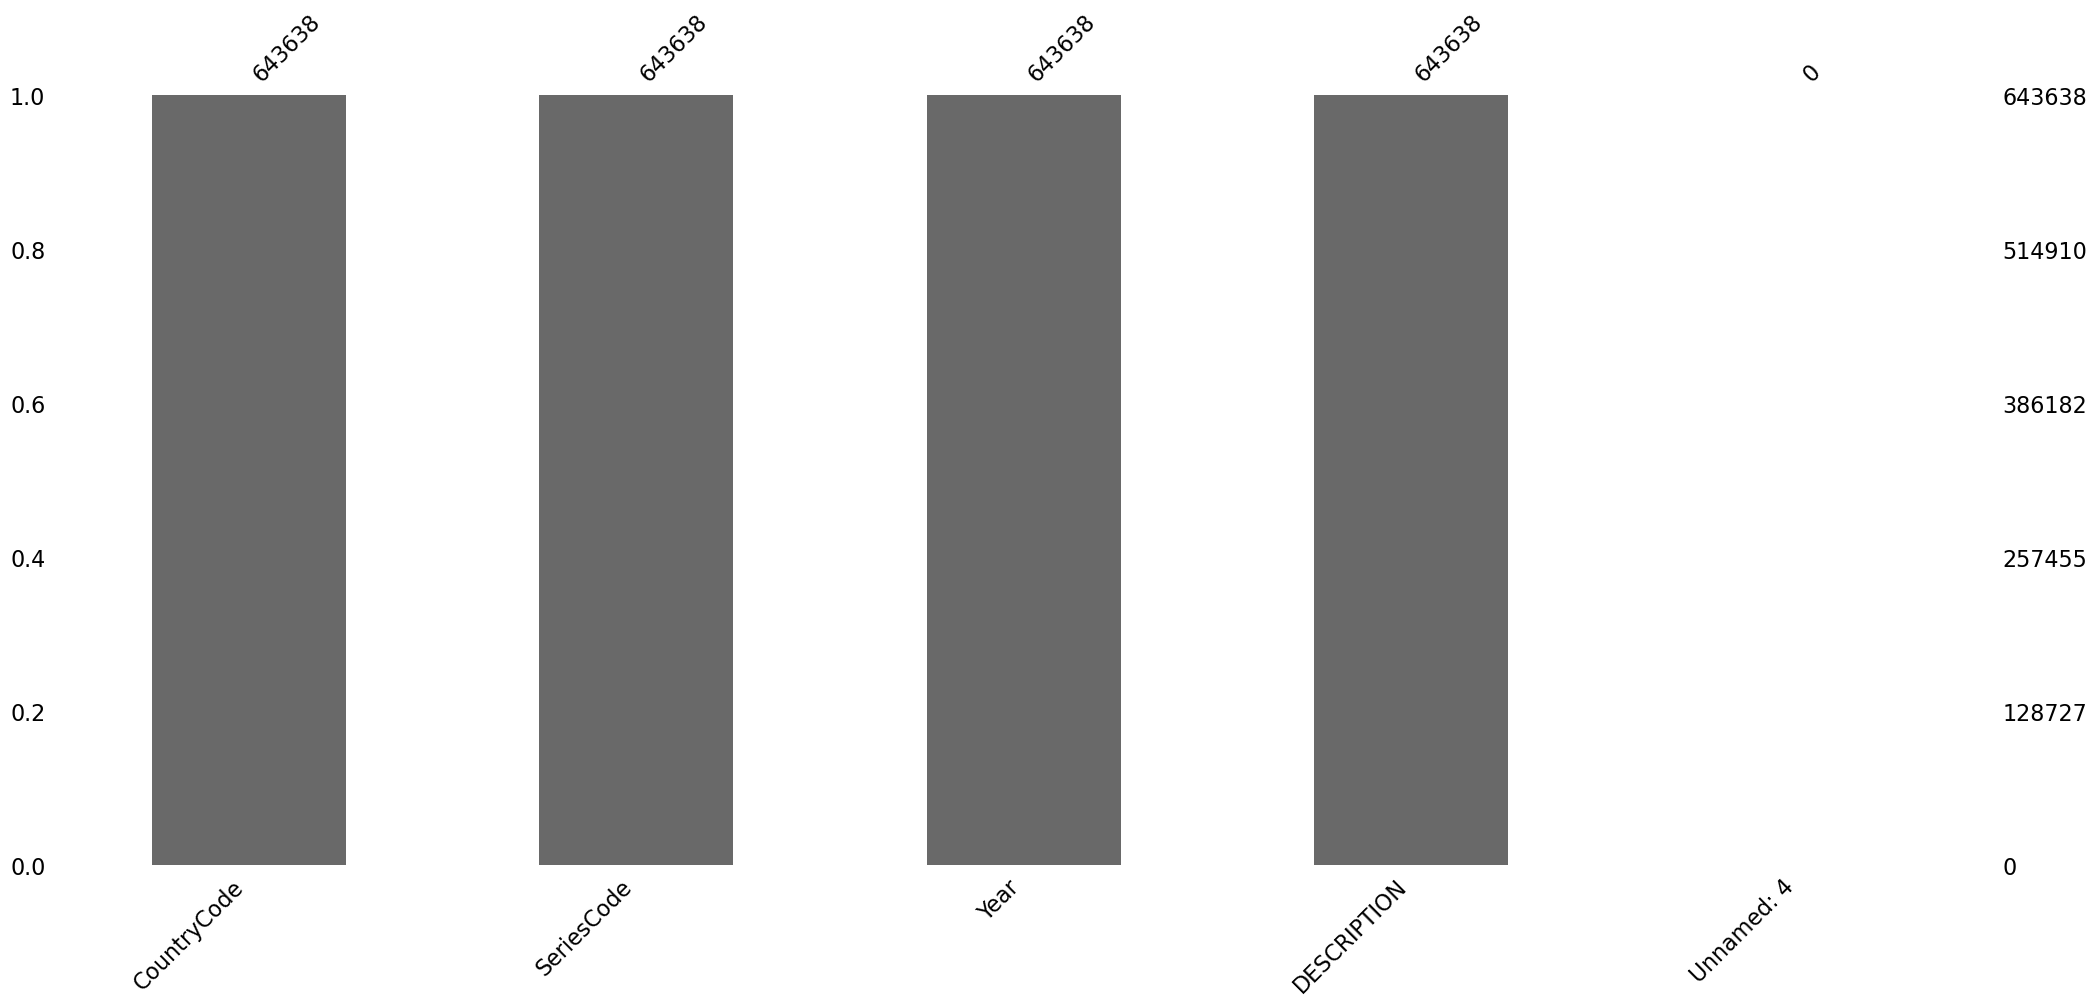

In [120]:
msno.bar(footnote_df)

###### La colonne Unnamed : 4 est null, je la supprime

In [122]:
footnote_df_cleaned=footnote_df.drop(columns=['Unnamed: 4'])

In [123]:
print("Les colonnes conservées après avoir supprimé les colonnes vides sont :", footnote_df_cleaned.columns.tolist())

Les colonnes conservées après avoir supprimé les colonnes vides sont : ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION']


#### Analyse par type de données

##### J'identifie les types de données

In [126]:
footnote_df_cleaned.dtypes

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

##### J'analyse les valeurs catégorielles (objet)

In [128]:
nbr_footnote_countries=footnote_df_cleaned['CountryCode'].nunique()
nbr_footnote_SeriesCode=footnote_df_cleaned['SeriesCode'].nunique()


In [129]:
print("La footnote_cleaned_df rassemble des informations sur", nbr_footnote_countries,"pays différents")
print("La table footnote_cleaned_df rassemble des informations sur", nbr_footnote_SeriesCode ,"series différents")

La footnote_cleaned_df rassemble des informations sur 239 pays différents
La table footnote_cleaned_df rassemble des informations sur 1558 series différents


In [130]:
footnote_df_cleaned['SeriesCode'].value_counts()

SeriesCode
SH.DYN.MORT                 9226
SE.PRM.AGES                 8771
SE.PRM.DURS                 8771
SE.SEC.DURS                 8619
SE.SEC.AGES                 8581
                            ... 
SABER.STD.ASS.GOAL1.LVL2       1
SABER.STD.ASS.GOAL2            1
SABER.STD.ASS.GOAL2.LVL1       1
SABER.STD.ASS.GOAL2.LVL2       1
UIS.XSPENDP.1.FDPUB.FNS        1
Name: count, Length: 1558, dtype: int64

In [131]:
footnote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


#### Conclusion de l'exploration et du nettoyage de footnote_df
Chaque ligne de la table correspond à un couple unique année/pays/seriesCode 
La table footnote donne des informations sur des notes ou commentaires expliquant les limites,incertitudes, estimations ou méthodes par indicateur, par pays et par années.  
Nous n'auront pas besoin de ces informations dans un premier temps.

Concernant le nettoyage :  
Aucun doublon n’a été détecté.  
Une colonne (Unnamed : 3)  vide à 100 %, a été supprimée.  

In [133]:
print("La taille du jeu de données avant nettoyage est de", footnote_df.shape[0], "lignes et", footnote_df.shape[1], "colonnes.")
print("La taille du jeu de données après nettoyage est de", footnote_df_cleaned.shape[0], "lignes et", footnote_df_cleaned.shape[1], "colonnes.")

La taille du jeu de données avant nettoyage est de 643638 lignes et 5 colonnes.
La taille du jeu de données après nettoyage est de 643638 lignes et 4 colonnes.


## Etape 3 : Analyse et nettoyage des "faux-pays"

#####  L’objectif de cette étape est de restreindre le périmètre des données en ne conservant que les pays et en écartant les régions ou continents (surnommés "faux pays").

###  Identification des faux-pays

#Je regarde de plus près les lignes du fichier Country pour identifier des faux pays.

#Rappel des informations sur la table

In [139]:
country_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       241 non-null    object 
 1   Short Name                         241 non-null    object 
 2   Table Name                         241 non-null    object 
 3   Long Name                          241 non-null    object 
 4   2-alpha code                       238 non-null    object 
 5   Currency Unit                      215 non-null    object 
 6   Region                             214 non-null    object 
 7   Income Group                       214 non-null    object 
 8   WB-2 code                          240 non-null    object 
 9   National accounts base year        205 non-null    object 
 10  SNA price valuation                197 non-null    object 
 11  System of National Accounts        215 non-null    object 

In [140]:
country_list=country_df_cleaned['Short Name'].unique().tolist()

In [141]:
print("Les pays disponibles sont les suivants :", country_list)

Les pays disponibles sont les suivants : ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro

In [142]:
print("'countries' uniques - dont faux pays :", country_df_cleaned['Country Code'].nunique())
print("Régions uniques :", country_df_cleaned['Region'].unique())
print("Nombre de régions différentes :", country_df_cleaned['Region'].nunique())
print("Nombre de lignes sans région :", country_df_cleaned['Region'].isna().sum())

'countries' uniques - dont faux pays : 241
Régions uniques : ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']
Nombre de régions différentes : 7
Nombre de lignes sans région : 27


In [143]:
non_countries = country_df[country_df['Region'].isna()]
print(non_countries[['Short Name','Country Code', 'Region']])

                                         Short Name Country Code Region
5                                        Arab World          ARB    NaN
57            East Asia & Pacific (developing only)          EAP    NaN
58          East Asia & Pacific (all income levels)          EAS    NaN
59          Europe & Central Asia (developing only)          ECA    NaN
60        Europe & Central Asia (all income levels)          ECS    NaN
63                                        Euro area          EMU    NaN
68                                   European Union          EUU    NaN
78                                        Gibraltar          GIB    NaN
89                                      High income          HIC    NaN
92           Heavily indebted poor countries (HIPC)          HPC    NaN
116     Latin America & Caribbean (developing only)          LAC    NaN
122   Latin America & Caribbean (all income levels)          LCN    NaN
123    Least developed countries: UN classification          LDC

In [144]:
print("Nous avons, en filtrant les lignes sans valeur dans la colonne 'région', identifié",non_countries.shape[0],"'faux pays'")

Nous avons, en filtrant les lignes sans valeur dans la colonne 'région', identifié 27 'faux pays'


###  Suppression des faux-pays

#### Définition de la liste des country code qui ne sont pas des pays (région...) 

In [147]:
non_countries_codes=non_countries['Country Code'].tolist()

#### Suppression des faux-pays country_df_cleaned

In [149]:
country_df_cleaned_onlycountry = country_df_cleaned[ ~ country_df_cleaned['Country Code'].isin(non_countries_codes) ] 

In [150]:
country_df_cleaned_onlycountry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 240
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Code                       214 non-null    object 
 1   Short Name                         214 non-null    object 
 2   Table Name                         214 non-null    object 
 3   Long Name                          214 non-null    object 
 4   2-alpha code                       211 non-null    object 
 5   Currency Unit                      214 non-null    object 
 6   Region                             214 non-null    object 
 7   Income Group                       214 non-null    object 
 8   WB-2 code                          213 non-null    object 
 9   National accounts base year        205 non-null    object 
 10  SNA price valuation                197 non-null    object 
 11  System of National Accounts        214 non-null    object 
 12 

In [151]:
 country_df_cleaned_onlycountry['Country Code'].nunique()

214

#### suppression dans les autres data frame 

##### - en utilisant les jointures

##### data_df

###### Je merge data_df_cleaned avec country_df_cleaned_onlycountry en ne gardant que les vrais pays.  
J'en profite pour ajouter l'information sur les régions dans la table data.

In [156]:
data_df_cleaned_onlycountries = data_df_cleaned.merge(country_df_cleaned_onlycountry[['Country Code', 'Region']], on='Country Code', how='inner')

In [157]:
data_df_cleaned['Country Name'].nunique()

115

In [158]:
data_df_cleaned_onlycountries['Country Name'].nunique()

88

##### Il ne reste plus que 87 pays représentés dans la tables data après avec supprimés les faux-pays

##### country_series

In [161]:
country_series_df_cleaned_onlycountries = country_series_df_cleaned.merge(country_df_cleaned_onlycountry[['Country Code']], left_on='CountryCode', right_on='Country Code', how='inner')

In [162]:
country_series_df_cleaned['CountryCode'].nunique()

211

In [163]:
country_series_df_cleaned_onlycountries['CountryCode'].nunique()

210

##### Il ne reste plus que 207 pays représentés dans la tables country_series après avec supprimés les faux-pays

##### Footnote

In [166]:
footnote_df_cleaned_onlycountries = footnote_df_cleaned.merge(country_df_cleaned_onlycountry[['Country Code']], left_on='CountryCode', right_on='Country Code', how='inner')

In [167]:
footnote_df_cleaned['CountryCode'].nunique()

239

In [168]:
footnote_df_cleaned_onlycountries['CountryCode'].nunique()

211

# Partie 2

##  Etape 1 : Réduire le périmètre en utilisant une approche métier

#L'objectif de cette étape est de réduire le périmètre des données en identifiant les informations utiles pour notre étude notamment :  
- les indicateurs qui nous seront utiles,
- les années a concerver, qui définieront le périmètre d'étude

### Selection des indicateurs

#### Observation des topics disponibles

#Je veux selectionner les topics qui pourraient m'interesser

In [175]:
series_df_cleaned['Topic'].value_counts()

Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                  

#####  "population topic, secondary, Policy & Debt: Atlas GNI & GNI per capita, Education Equality" sont des topics qui pourraient répondre à notre problématique

#### Observation des indicateurs disponibles par topic 

##### - Pour chaque topic préselectionné, j'observe les indicateurs disponibles, afin de potentiellement les selectionnés pour la suite de notre étude

In [179]:
series_df_cleaned[series_df_cleaned['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']['Indicator Name']

1668    GNI per capita, Atlas method (current US$)
Name: Indicator Name, dtype: object

In [180]:
series_df_cleaned[series_df_cleaned['Topic'] == 'Education Equality']['Indicator Name'].tolist()

['DHS: Gross attendance rate. Post Secondary',
 'DHS: Gross attendance rate. Post Secondary. Female',
 'DHS: Gross attendance rate. Post Secondary. Male',
 'DHS: Gross attendance rate. Post Secondary. Quintile 1',
 'DHS: Gross attendance rate. Post Secondary. Quintile 2',
 'DHS: Gross attendance rate. Post Secondary. Quintile 3',
 'DHS: Gross attendance rate. Post Secondary. Quintile 4',
 'DHS: Gross attendance rate. Post Secondary. Quintile 5',
 'DHS: Gross attendance rate. Post Secondary. Rural',
 'DHS: Gross attendance rate. Post Secondary. Urban',
 'DHS: Net attendance rate. Primary',
 'DHS: Net attendance rate. Primary. Female',
 'DHS: Net attendance rate. Primary. Male',
 'DHS: Net attendance rate. Primary. Quintile 1',
 'DHS: Net attendance rate. Primary. Quintile 2',
 'DHS: Net attendance rate. Primary. Quintile 3',
 'DHS: Net attendance rate. Primary. Quintile 4',
 'DHS: Net attendance rate. Primary. Quintile 5',
 'DHS: Net attendance rate. Primary. Rural',
 'DHS: Net attendan

#### Recherche des indicateurs par mots clés

In [665]:
indicator =series_df[series_df['Indicator Name'].str.contains('withdrawal', case=False, na=False)]['Indicator Name']
print(indicator.unique())

[]


##### Ici, je selectionne "Enrolment in lower secondary general, both sexes (number)", 

#### Selection d'une liste d'indicateur

##### Grace à l'exploration,cela m'a permis de selectionner les indicateurs suivants, qui semblent pertinants, en ayant une approche métier: 

In [298]:
indicators = [
    'Population growth (annual %)',
    'Internet users (per 100 people)',
    'Personal computers (per 100 people)',
    'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total',
    'GNI per capita, Atlas method (current US$)',
    'Youth literacy rate, population 15-24 years, both sexes (%)',
    'Population, total',
    'Enrolment in secondary education, both sexes (number)',
    'Population of the official age for lower secondary education, both sexes (number)',
    'Gross enrolment ratio, secondary, both sexes (%)',
    'Net enrolment rate, secondary, both sexes (%)',
    'Population, ages 15-24, total',
    'Population of the official entrance age to secondary general education, both sexes (number)'
]

#### Extraction des données correspondants au seuls indicateurs selectionnées dans la table data

##### table data : conservation des seuls indicateurs selectionnées dans la liste 'indicators"

In [302]:
selected_data_df = data_df_cleaned_onlycountries[data_df_cleaned_onlycountries['Indicator Name'].isin(indicators)]
nrb_indicateur = selected_data_df['Indicator Name'].nunique()

In [304]:
print("Dans ma table data, je conserve les seuls", nrb_indicateur ,"indicateurs préselectionnés par l'approche métier")

Dans ma table data, je conserve les seuls 13 indicateurs préselectionnés par l'approche métier


###### Je vérifie si l'ensemble des indicateurs préselectionnés sont dans la table data.

In [307]:
print(selected_data_df['Indicator Name'].nunique() == len(indicators))

True


###### True = j'ai le même nombre d'indicateur

In [310]:
set(indicators) - set(selected_data_df['Indicator Name'].unique())

set()

### Selection des années - approche métier

#### Choix métier des années

#Nous cherchons à  mieux identifier les pays présentant un fort potentiel pour l’expansion internationale de notre offre de formation en ligne.  
Il est pertinent de s'interessés aux données les plus récentes pour donnée une image la plus représentative des caractéristiques actuelles des pays --> Il n'est pas pertinent de concerver les années avant 2010
Par ailleurs,  les données deviennent nulles ou se limitent à des projections à partir de 2017. --> il est pertinent de concentrer l’analyse sur la période allant jusqu’en 2016.  
Cette sélection garantit l’utilisation de donnéesles plus complétes possibles mais également les plus récentes.

#Je créer une liste qui des années selectionnées (de 2010 à 2016)

In [316]:
period=np.arange(2010,2017,1) 
period

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

####  Extraction des informations dans la table data

##### Je ne garde que les colonnes indiqués de la table data

In [320]:
colonnes = ['Country Name','Country Code', 'Indicator Name','Indicator Code','Region', '2010', '2011', '2012', '2013', '2014', '2015','2016']
selected_data_periode_df = selected_data_df[colonnes]
selected_data_periode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 1191 to 318851
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1131 non-null   object 
 1   Country Code    1131 non-null   object 
 2   Indicator Name  1131 non-null   object 
 3   Indicator Code  1131 non-null   object 
 4   Region          1131 non-null   object 
 5   2010            794 non-null    float64
 6   2011            751 non-null    float64
 7   2012            732 non-null    float64
 8   2013            726 non-null    float64
 9   2014            724 non-null    float64
 10  2015            770 non-null    float64
 11  2016            485 non-null    float64
dtypes: float64(7), object(5)
memory usage: 114.9+ KB


## Etape 2 - Réduisez le périmètre en utilisant une approche data

#Dans cette étape, il est demandé de partir des indicateurs pré-sélectionnés par une approche métier, et d'étudier leur pertinences en utilisant une approche data, notamment en vérifiant la disponibilité des données

### Disponibilité de la données dans les indicateurs selectionnés

#J'observe, pour chaque indicateur, le nombre de pays pour lesquels une donnée est disponible.

In [326]:
selected_data_periode_df.groupby('Indicator Name').apply(lambda x: x.notna().sum())

C:\Users\mathi\AppData\Local\Temp\ipykernel_4140\2667545065.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Country Name  \
Indicator Name                                                     
Enrolment in secondary education, both sexes (n...            87   
GNI per capita, Atlas method (current US$)                    87   
Gross enrolment ratio, secondary, both sexes (%)              87   
Internet users (per 100 people)                               87   
Net enrolment rate, secondary, both sexes (%)                 87   
Personal computers (per 100 people)                           87   
Population growth (annual %)                                  87   
Population of the official age for lower second...            87   
Population of the official entrance age to seco...            87   
Population, ages 15-24, total                                 87   
Population, total                                             87   
Wittgenstein Projection: Population in thousand...            87   
Youth literacy rate, population 15-24 years, bo...            87   

                                                    Country Code  \
Indicator Name                                                     
Enrolment in secondary education, both sexes (n...            87   
GNI per capita, Atlas method (current US$)                    87   
Gross enrolment ratio, secondary, both sexes (%)              87   
Internet users (per 100 people)                               87   
Net enrolment rate, secondary, both sexes (%)                 87   
Personal computers (per 100 people)                           87   
Population growth (annual %)                                  87   
Population of the official age for lower second...            87   
Population of the official entrance age to seco...            87   
Population, ages 15-24, total                                 87   
Population, total                                             87   
Wittgenstein Projection: Population in thousand...            87   
Youth literacy rate, population 15-24 years, bo...            87   

                                                    Indicator Name  \
Indicator Name                                                       
Enrolment in secondary education, both sexes (n...              87   
GNI per capita, Atlas method (current US$)                      87   
Gross enrolment ratio, secondary, both sexes (%)                87   
Internet users (per 100 people)                                 87   
Net enrolment rate, secondary, both sexes (%)                   87   
Personal computers (per 100 people)                             87   
Population growth (annual %)                                    87   
Population of the official age for lower second...              87   
Population of the official entrance age to seco...              87   
Population, ages 15-24, total                                   87   
Population, total                                               87   
Wittgenstein Projection: Population in thousand...              87   
Youth literacy rate, population 15-24 years, bo...              87   

                                                    Indicator Code  Region  \
Indicator Name                                                               
Enrolment in secondary education, both sexes (n...              87      87   
GNI per capita, Atlas method (current US$)                      87      87   
Gross enrolment ratio, secondary, both sexes (%)                87      87   
Internet users (per 100 people)                                 87      87   
Net enrolment rate, secondary, both sexes (%)                   87      87   
Personal computers (per 100 people)                             87      87   
Population growth (annual %)                                    87      87   
Population of the official age for lower second...              87      87   
Population of the official entrance age to seco...              87      87   
Population, ages 15-24, total                                   87      87   
Population, total      

#Dans le cadre de l’analyse des données éducatives par pays, certains indicateurs doivent être cartés en raison d’un manque  de données disponibles sur la période 2010–2016. Notamment :  

"Personal computers (per 100 people)" : aucune donnée n’est disponible sur la période étudiée, ce qui rend l’indicateur inexploitable pour une comparaison inter-pays.  

"Wittgenstein Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total" : les données sont absentes ou très partielles après 2013, car il s’agit de projections plutôt que de mesures réelles. Elles sont donc moins pertinentes dans un objectif d’analyse comparative actuelle.  

"Net enrolment rate, secondary, both sexes (%)" : la couverture reste très faible, avec seulement une quarantaine de pays renseignés, ce qui limite fortement l’analyse globale.

### Selection des indicateurs

#Les indicateurs selectionnées par l'approche métier + data sont les suivants : 

In [329]:
indicators_dispo = [
    'Population growth (annual %)',
    'Internet users (per 100 people)',
    'GNI per capita, Atlas method (current US$)',
    'Youth literacy rate, population 15-24 years, both sexes (%)',
    'Population, total',
    'Enrolment in secondary education, both sexes (number)',
    'Population of the official age for lower secondary education, both sexes (number)',
    'Gross enrolment ratio, secondary, both sexes (%)',
    'Population, ages 15-24, total',
    'Population of the official entrance age to secondary general education, both sexes (number)'
]
 

## Etape 3 Consolidez vos résultats dans un dataframe (pays, indicateurs)

###### Le but de cette étape est de consolidez la dataframe pour permettre de comparer les pays entre eux 

### Filtrage des indicateurs retenus dans le jeu de données data

##### table data : je conserve des seuls indicateurs selectionnées dans la liste 'indicators_dispo", en supprimant ainsi les indicateurs écartés par l'"approche data".

In [335]:
selected_data_periode_df = selected_data_periode_df[selected_data_periode_df['Indicator Name'].isin(indicators_dispo)]

In [337]:
nrb_indicateur = selected_data_periode_df['Indicator Name'].nunique()
print("Dans ma table data, je conserve les seuls", nrb_indicateur ,"indicateurs préselectionnés par l'approche métier et data")

Dans ma table data, je conserve les seuls 10 indicateurs préselectionnés par l'approche métier et data


### Intégration de la moyenne des années

#Je calcule la moyenne des indicateurs pour n'en garder que 1 score par indicateur et par pays 

In [341]:
selected_data_periode_df['mean_2010_2016'] = selected_data_periode_df.loc[:, '2010':'2016'].mean(axis=1)

#Je supprime les années afin de ne garder qu'un score par indicateur et par pays 

In [344]:
selected_data_by_country_df = selected_data_periode_df.drop(['2010','2011','2012','2013','2014','2015','2016'], axis=1)

In [346]:
selected_data_by_country_df .info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 1191 to 318851
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    870 non-null    object 
 1   Country Code    870 non-null    object 
 2   Indicator Name  870 non-null    object 
 3   Indicator Code  870 non-null    object 
 4   Region          870 non-null    object 
 5   mean_2010_2016  760 non-null    float64
dtypes: float64(1), object(5)
memory usage: 47.6+ KB


### Transformation du jeu de données : Pivot en un pays par ligne, un indicateur par colonne

#Pour faciliter la comparaison entre pays, chaque ligne doit correspondre à un pays et chaque colonne doit correspondre à un indicateur.  

In [350]:
pivot_data_by_country_df =  selected_data_by_country_df.pivot_table(
    index='Country Name',        
    columns='Indicator Name',     
    values='mean_2010_2016',     
    aggfunc='mean'                
).round(2)
pivot_data_by_country_df

Indicator Name        Enrolment in secondary education, both sexes (number)  \
Country Name                                                                  
Afghanistan                                                2.418162e+06       
Albania                                                    3.425055e+05       
Algeria                                                    4.594370e+06       
American Samoa                                                      NaN       
Andorra                                                    4.229830e+03       
...                                                                 ...       
Honduras                                                   6.463633e+05       
Hong Kong SAR, China                                       4.551740e+05       
Hungary                                                    8.711733e+05       
Iceland                                                    3.630125e+04       
India                                                      1.198241e+08       

Indicator Name        GNI per capita, Atlas method (current US$)  \
Country Name                                                       
Afghanistan                                               598.57   
Albania                                                  4360.00   
Algeria                                                  4878.57   
American Samoa                                               NaN   
Andorra                                                      NaN   
...                                                          ...   
Honduras                                                 1997.14   
Hong Kong SAR, China                                    38381.43   
Hungary                                                 13074.29   
Iceland                                                 45358.57   
India                                                    1490.00   

Indicator Name        Gross enrolment ratio, secondary, both sexes (%)  \
Country Name                                                             
Afghanistan                                                      55.42   
Albania                                                          93.34   
Algeria                                                          98.52   
American Samoa                                                     NaN   
Andorra                                                            NaN   
...                                                                ...   
Honduras                                                         71.34   
Hong Kong SAR, China                                             97.50   
Hungary                                                         103.83   
Iceland                                                         111.89   
India                                                            69.34   

Indicator Name        Internet users (per 100 people)  \
Country Name                                            
Afghanistan                                      6.60   
Albania                                         56.51   
Algeria                                         25.54   
American Samoa                                    NaN   
Andorra                                         90.45   
...                                               ...   
Honduras                                        19.94   
Hong Kong SAR, China                            77.63   
Hungary                                         72.00   
Iceland                                         96.51   
India                                           17.40   

Indicator Name        Population growth (annual %)  \
Country Name                                         
Afghanistan                                   3.04   
Albania                                      -0.25   
Algeria                                       1.93   
American Samoa                               -0.16   
Andorra                                      -1.27   
... 

### Consolidation des résultats 

#### je met Country_name dans une colomne

In [354]:
pivot_data_by_country_df = pivot_data_by_country_df.reset_index()

#### je renomme les colonnes de mon tableau

In [357]:
list(pivot_data_by_country_df.columns)

['Country Name',
 'Enrolment in secondary education, both sexes (number)',
 'GNI per capita, Atlas method (current US$)',
 'Gross enrolment ratio, secondary, both sexes (%)',
 'Internet users (per 100 people)',
 'Population growth (annual %)',
 'Population of the official age for lower secondary education, both sexes (number)',
 'Population of the official entrance age to secondary general education, both sexes (number)',
 'Population, ages 15-24, total',
 'Population, total',
 'Youth literacy rate, population 15-24 years, both sexes (%)']

In [361]:
pivot_data_by_country_df.rename(columns={
    'Country Name': 'country',
    'Enrolment in secondary education, both sexes (number)': 'enrol_sec_number',
    'GNI per capita, Atlas method (current US$)': 'gni_per_capita',
    'Gross enrolment ratio, secondary, both sexes (%)': 'gross_enrol_ratio_sec',
    'Internet users (per 100 people)': 'internet_users_per_100',
    'Population growth (annual %)': 'pop_growth_pct',
    'Population of the official age for lower secondary education, both sexes (number)': 'pop_lower_sec_age',
    'Population of the official entrance age to secondary general education, both sexes (number)': 'pop_sec_entry_age',
    'Population, ages 15-24, total': 'pop_15_24',
    'Population, total': 'pop_total',
    'Youth literacy rate, population 15-24 years, both sexes (%)' : 'youth_lit_rate%'
}, inplace=True)
pivot_data_by_country_df

Indicator Name               country  enrol_sec_number  gni_per_capita  \
0                        Afghanistan      2.418162e+06          598.57   
1                            Albania      3.425055e+05         4360.00   
2                            Algeria      4.594370e+06         4878.57   
3                     American Samoa               NaN             NaN   
4                            Andorra      4.229830e+03             NaN   
..                               ...               ...             ...   
82                          Honduras      6.463633e+05         1997.14   
83              Hong Kong SAR, China      4.551740e+05        38381.43   
84                           Hungary      8.711733e+05        13074.29   
85                           Iceland      3.630125e+04        45358.57   
86                             India      1.198241e+08         1490.00   

Indicator Name  gross_enrol_ratio_sec  internet_users_per_100  pop_growth_pct  \
0                               55.42                    6.60            3.04   
1                               93.34                   56.51           -0.25   
2                               98.52                   25.54            1.93   
3                                 NaN                     NaN           -0.16   
4                                 NaN                   90.45           -1.27   
..                                ...                     ...             ...   
82                              71.34                   19.94            1.80   
83                              97.50                   77.63            0.75   
84                             103.83                   72.00           -0.29   
85                             111.89                   96.51            0.69   
86                              69.34                   17.40            1.24   

Indicator Name  pop_lower_sec_age  pop_sec_entry_age     pop_15_24  \
0                      2322568.17          817079.71  6.679801e+06   
1                       194402.29           44911.71  5.856280e+05   
2                      2371820.83          577199.43  6.869491e+06   
3                             NaN                NaN           NaN   
4                             NaN                NaN           NaN   
..                            ...                ...           ...   
82                      543846.00          181030.86  1.684122e+06   
83                      197758.00           61874.57  8.737838e+05   
84                      391771.86           96064.43  1.187388e+06   
85                       13101.43            4296.86  4.481617e+04   
86                    75083046.67        25215835.14  2.401628e+08   

Indicator Name     pop_total  youth_lit_rate%  
0               3.172728e+07            46.99  
1               2.894231e+06            99.01  
2               3.834750e+07              NaN  
3               5.543814e+04              NaN  
4               8.084814e+04           100.00  
..                       ...              ...  
82              8.656103e+06            95.56  
83              7.190286e+06              NaN  
84              9.901807e+06              NaN  
85              3.248554e+05              NaN  
86              1.278133e+09            86.14  

[87 rows x 11 columns]

### Création d'une table indicator_df afin d'avoir une définition des indicateur

##### J'extrait mes indicateurs et leurs codes

In [365]:
indicators_df = selected_data_by_country_df[[
    'Indicator Name', 'Indicator Code'
]].drop_duplicates()
indicators_df

Indicator Name     Indicator Code
1191  Enrolment in secondary education, both sexes (...        SE.SEC.ENRL
1251         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD
1335   Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR
1375                    Internet users (per 100 people)     IT.NET.USER.P2
2307                       Population growth (annual %)        SP.POP.GROW
2311  Population of the official age for lower secon...     SP.SEC.LTOT.IN
2338  Population of the official entrance age to sec...  UIS.SAP.23.GPV.G1
2482                      Population, ages 15-24, total  SP.POP.1524.TO.UN
2533                                  Population, total        SP.POP.TOTL
3661  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS

##### Je complète ce tableau avec les informations disponibles dans series_df (définition)

In [368]:
indicator_info_df=indicators_df.merge(series_df, on='Indicator Name', how='left')
indicator_info_df

Indicator Name     Indicator Code  \
0  Enrolment in secondary education, both sexes (...        SE.SEC.ENRL   
1         GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD   
2   Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
3                    Internet users (per 100 people)     IT.NET.USER.P2   
4                       Population growth (annual %)        SP.POP.GROW   
5  Population of the official age for lower secon...     SP.SEC.LTOT.IN   
6  Population of the official entrance age to sec...  UIS.SAP.23.GPV.G1   
7                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
8                                  Population, total        SP.POP.TOTL   
9  Youth literacy rate, population 15-24 years, b...  SE.ADT.1524.LT.ZS   

         Series Code                                              Topic  \
0        SE.SEC.ENRL                                          Secondary   
1     NY.GNP.PCAP.CD  Economic Policy & Debt: National accounts: Atl...   
2        SE.SEC.ENRR                                          Secondary   
3     IT.NET.USER.P2                     Infrastructure: Communications   
4        SP.POP.GROW                       Health: Population: Dynamics   
5     SP.SEC.LTOT.IN                                         Population   
6  UIS.SAP.23.GPV.G1                                         Population   
7  SP.POP.1524.TO.UN                                         Population   
8        SP.POP.TOTL                      Health: Population: Structure   
9  SE.ADT.1524.LT.ZS                                           Literacy   

                                    Short definition  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Annual population growth rate. Population is b...   
5                                                NaN   
6                                                NaN   
7  Population, ages 15-24, total is the total pop...   
8                                                NaN   
9                                                NaN   

                                     Long definition  Unit of measure  \
0  Total number of students enrolled at public an...              NaN   
1  GNI per capita (formerly GNP per capita) is th...              NaN   
2  Total enrollment in secondary education, regar...              NaN   
3  Internet users are individuals who have used t...              NaN   
4  Annual population growth rate for year t is th...              NaN   
5  Population of the age-group theoretically corr...              NaN   
6  Population of the age-group theoretically corr...              NaN   
7  Population, ages 15-24, total is the total pop...              NaN   
8  Total population is based on the de facto defi...              NaN   
9  Number of people age 15 to 24 years who can bo...              NaN   

  Periodicity Base Period Other notes  ... Notes from original source  \
0         NaN         NaN         NaN  ...                        NaN   
1      Annual         NaN         NaN  ...                        NaN   
2         NaN         NaN         NaN  ...                        NaN   
3      Annual         NaN         NaN  ...                        NaN   
4      Annual         NaN         NaN  ...                        NaN   
5         NaN         NaN         NaN  ...                        NaN   
6         NaN         NaN         NaN  ...                        NaN   
7         NaN         NaN         NaN  ...                        NaN   
8      Annual         NaN         NaN  ...                        NaN   
9         NaN         NaN         NaN  ...                        NaN   

                                    General comments  \
0                                                NaN   
1                                                

### Visualisation du jeu de donnée

#### Répartition des taux d’accès à Internet dans les différents pays 

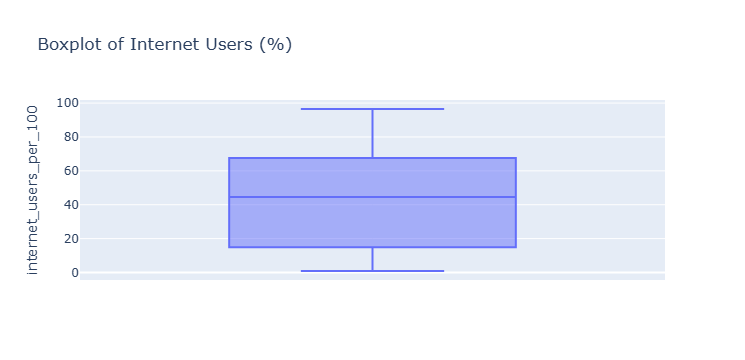

In [422]:
 px.box(
     pivot_data_by_country_df, 
      y="internet_users_per_100", 
    title="Boxplot of Internet Users (%)")

##### En moyenne, les pays ont 45% de leur population qui utilise internet, et la moitié des pays ont moins de 47 % d'utilisateurs   
(médianne et moyenne très proche) 25 % des pays ont plus de 69 % d'utilisateurs

#### J'observe toutes les distributions de chacun des variables 

##### J'utilise une boucle


 enrol_sec_number 
 count    7.400000e+01
mean     4.450854e+06
std      1.761535e+07
min      3.311670e+03
25%      8.444808e+04
50%      5.260421e+05
75%      1.516824e+06
max      1.198241e+08
Name: enrol_sec_number, dtype: float64 



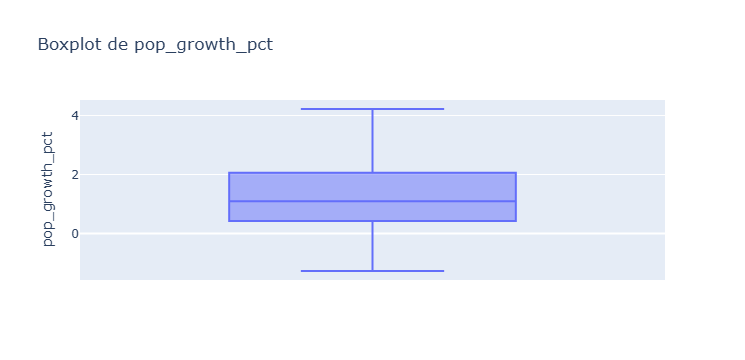

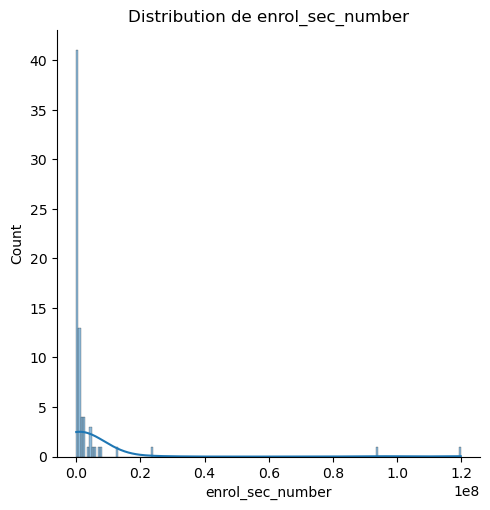


 gni_per_capita 
 count        76.000000
mean      13538.573553
std       19323.068852
min         261.430000
25%        1487.857500
50%        5669.285000
75%       14177.855000
max      107547.500000
Name: gni_per_capita, dtype: float64 



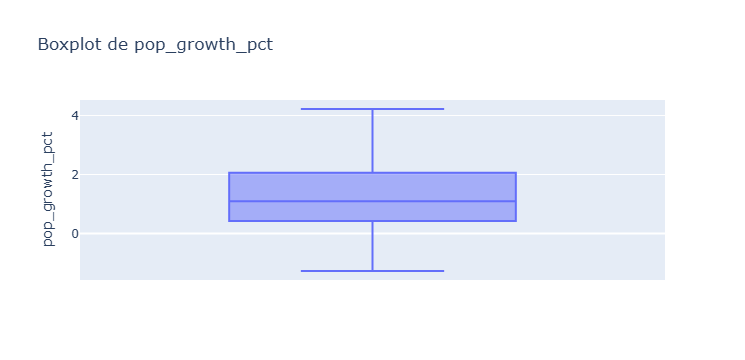

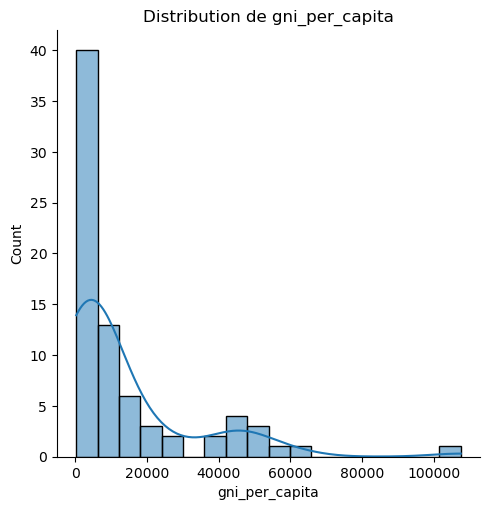


 gross_enrol_ratio_sec 
 count     71.000000
mean      82.774789
std       28.341014
min       17.560000
25%       59.750000
50%       92.630000
75%      101.135000
max      135.750000
Name: gross_enrol_ratio_sec, dtype: float64 



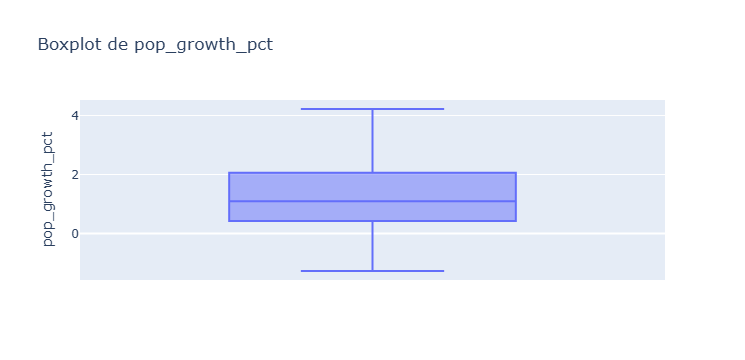

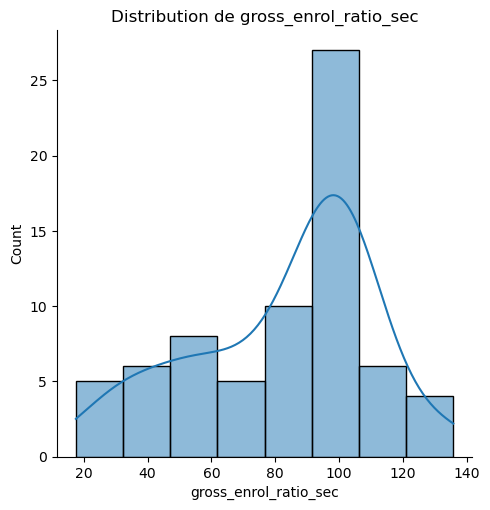


 internet_users_per_100 
 count    84.000000
mean     43.985833
std      29.302587
min       0.890000
25%      15.445000
50%      44.590000
75%      66.722500
max      96.510000
Name: internet_users_per_100, dtype: float64 



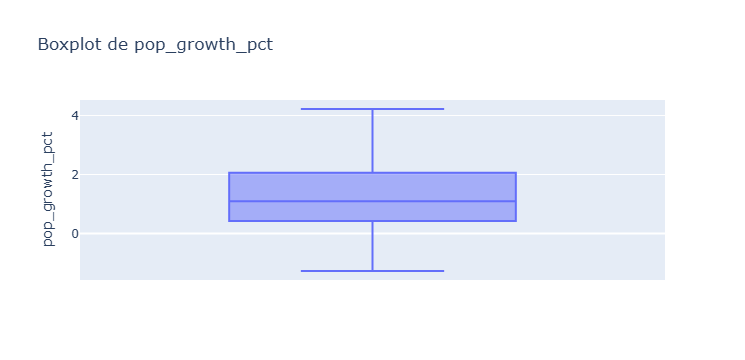

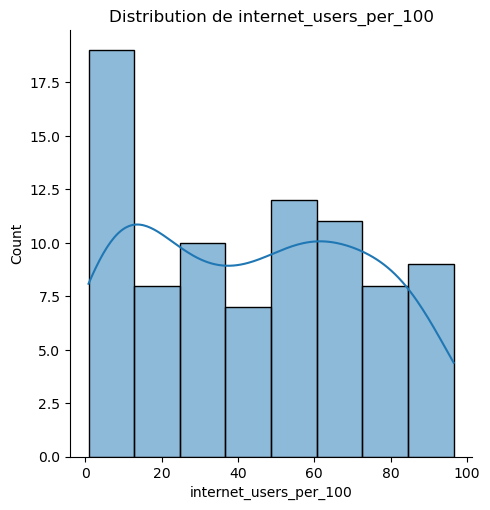


 pop_growth_pct 
 count    87.000000
mean      1.208391
std       1.158794
min      -1.270000
25%       0.435000
50%       1.090000
75%       2.015000
max       4.220000
Name: pop_growth_pct, dtype: float64 



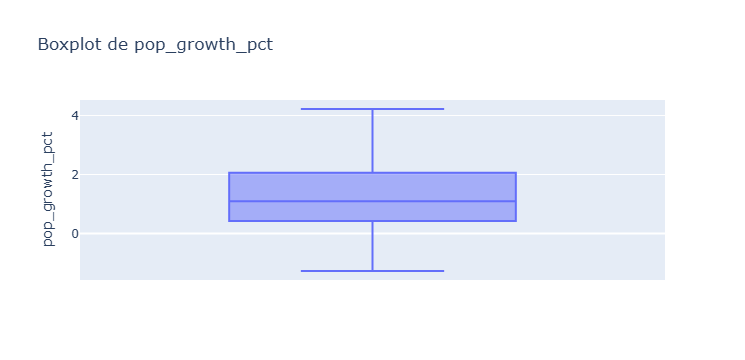

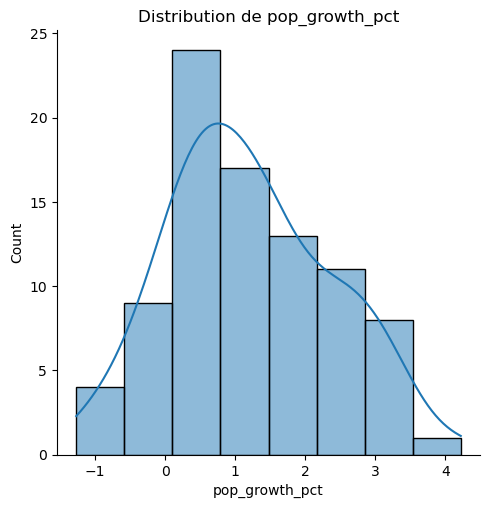


 pop_lower_sec_age 
 count    7.800000e+01
mean     2.687016e+06
std      1.004503e+07
min      2.420710e+03
25%      6.896975e+04
50%      3.745707e+05
75%      1.127436e+06
max      7.508305e+07
Name: pop_lower_sec_age, dtype: float64 



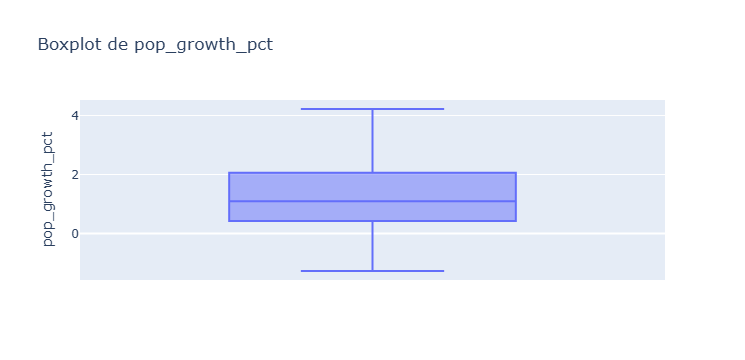

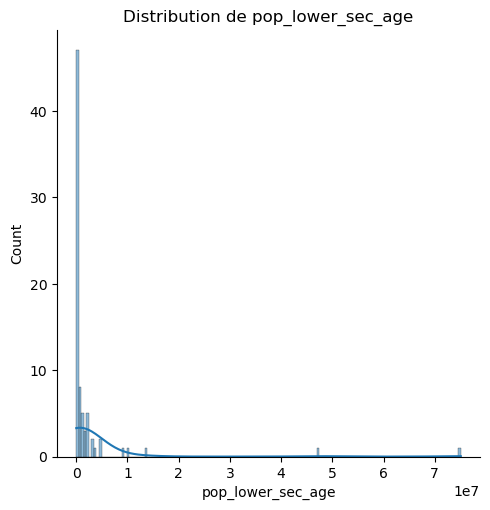


 pop_sec_entry_age 
 count    7.700000e+01
mean     8.564625e+05
std      3.345793e+06
min      8.077100e+02
25%      1.949000e+04
50%      1.061227e+05
75%      3.732190e+05
max      2.521584e+07
Name: pop_sec_entry_age, dtype: float64 



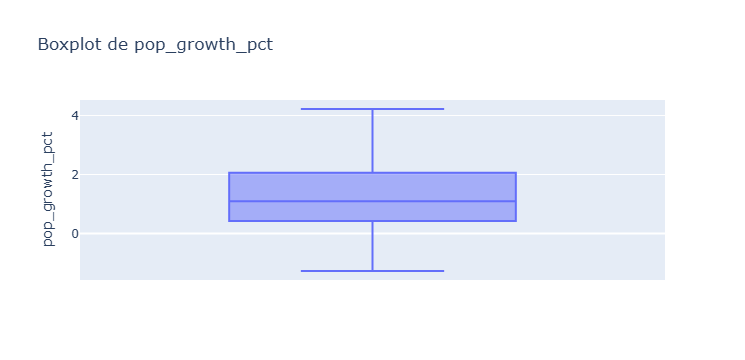

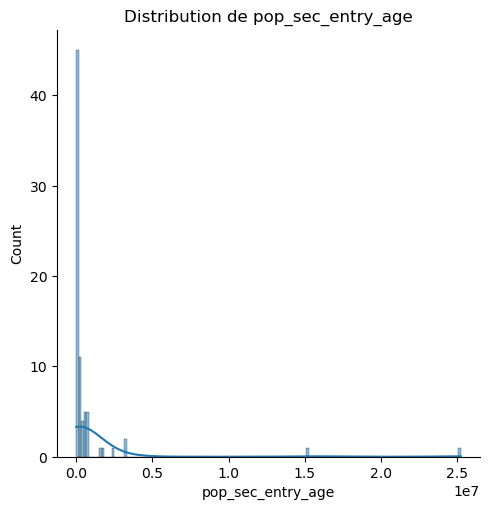


 pop_15_24 
 count    7.500000e+01
mean     9.257476e+06
std      3.648441e+07
min      1.386183e+04
25%      3.817792e+05
50%      1.187388e+06
75%      3.528718e+06
max      2.401628e+08
Name: pop_15_24, dtype: float64 



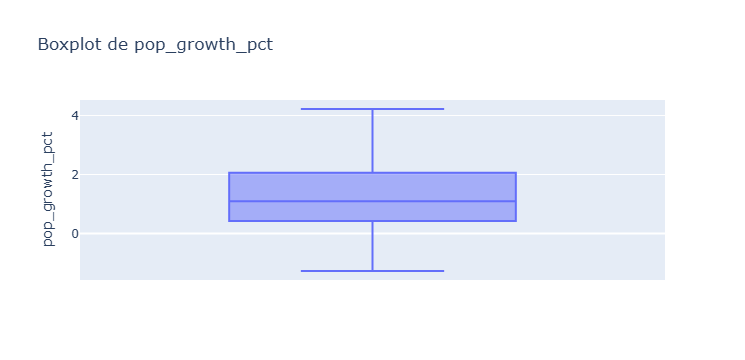

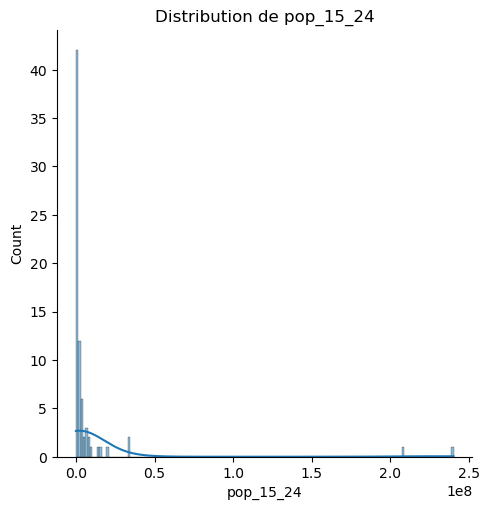


 pop_total 
 count    8.700000e+01
mean     4.652293e+07
std      1.988829e+08
min      4.878500e+04
25%      7.614083e+05
50%      5.626119e+06
75%      1.563078e+07
max      1.357724e+09
Name: pop_total, dtype: float64 



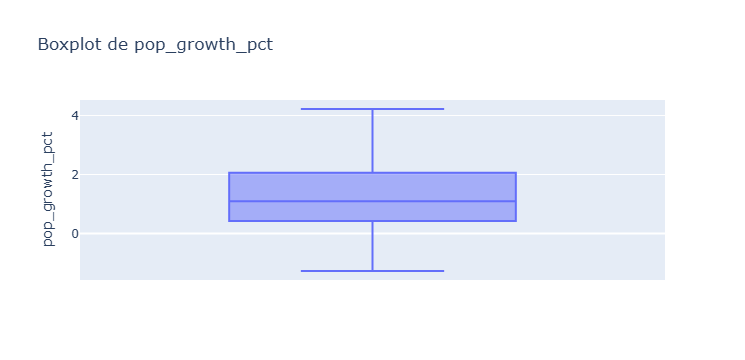

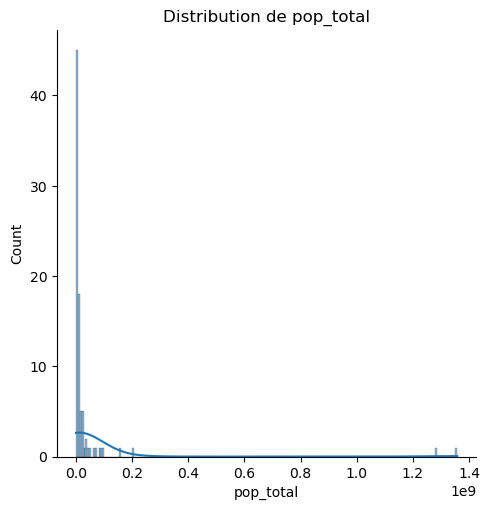


 youth_lit_rate% 
 count     51.000000
mean      85.934118
std       19.560116
min       34.780000
25%       80.065000
50%       97.270000
75%       99.265000
max      100.000000
Name: youth_lit_rate%, dtype: float64 



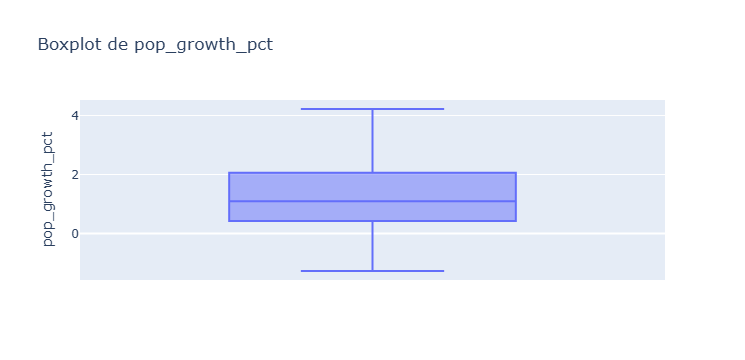

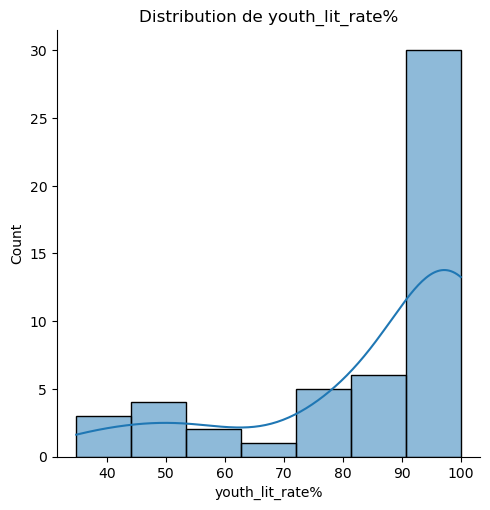

In [687]:
for i in pivot_data_by_country_df.select_dtypes(include='float').columns:
    print("\n", i, "\n", pivot_data_by_country_df[i].describe(), "\n")
      # Boxplot avec seaborn
    fig = px.box(pivot_data_by_country_df, y=col, title=f"Boxplot de {col}")
    fig.show()
    
    # Distribution avec displot
    sns.displot(pivot_data_by_country_df[i], kde=True)
    plt.title(f"Distribution de {i}")
    plt.show()
    


##### la majorité de pays de notre dataset ont un GNI per capita <10K/an 

# Partie 3 

## Etape 1. Identification les indicateurs redondants d'un point de vue statistique

### Matrice de correlation 

#La matrice de corrélation aide à identifier quelles variables sont liées entre elles, ce qui permet de détecter les redondances, choisir les variables les plus pertinentes, et éviter d’inclure des données trop similaires qui pourraient biaiser ou compliquer les modèles. + c'est près de 1, + c'est corrélé

In [390]:
pivot_data_by_country_df.drop(columns=["country"]).corr()

Indicator Name          enrol_sec_number  gni_per_capita  \
Indicator Name                                             
enrol_sec_number                1.000000       -0.096430   
gni_per_capita                 -0.096430        1.000000   
gross_enrol_ratio_sec          -0.016060        0.527704   
internet_users_per_100         -0.095654        0.773475   
pop_growth_pct                 -0.027196       -0.343746   
pop_lower_sec_age               0.990779       -0.108549   
pop_sec_entry_age               0.988429       -0.112416   
pop_15_24                       0.995677       -0.106120   
pop_total                       0.986359       -0.087490   
youth_lit_rate%                 0.077444        0.471295   

Indicator Name          gross_enrol_ratio_sec  internet_users_per_100  \
Indicator Name                                                          
enrol_sec_number                    -0.016060               -0.095654   
gni_per_capita                       0.527704                0.773475   
gross_enrol_ratio_sec                1.000000                0.856185   
internet_users_per_100               0.856185                1.000000   
pop_growth_pct                      -0.687761               -0.659168   
pop_lower_sec_age                   -0.068119               -0.110772   
pop_sec_entry_age                   -0.070009               -0.115537   
pop_15_24                           -0.042151               -0.088171   
pop_total                           -0.024850               -0.086669   
youth_lit_rate%                      0.844292                0.728627   

Indicator Name          pop_growth_pct  pop_lower_sec_age  pop_sec_entry_age  \
Indicator Name                                                                 
enrol_sec_number             -0.027196           0.990779           0.988429   
gni_per_capita               -0.343746          -0.108549          -0.112416   
gross_enrol_ratio_sec        -0.687761          -0.068119          -0.070009   
internet_users_per_100       -0.659168          -0.110772          -0.115537   
pop_growth_pct                1.000000          -0.022245          -0.009358   
pop_lower_sec_age            -0.022245           1.000000           0.998067   
pop_sec_entry_age            -0.009358           0.998067           1.000000   
pop_15_24                    -0.041979           0.985005           0.984377   
pop_total                    -0.026574           0.963518           0.960706   
youth_lit_rate%              -0.597313           0.055278           0.058785   

Indicator Name          pop_15_24  pop_total  youth_lit_rate%  
Indicator Name                                                 
enrol_sec_number         0.995677   0.986359         0.077444  
gni_per_capita          -0.106120  -0.087490         0.471295  
gross_enrol_ratio_sec   -0.042151  -0.024850         0.844292  
internet_users_per_100  -0.088171  -0.086669         0.728627  
pop_growth_pct          -0.041979  -0.026574        -0.597313  
pop_lower_sec_age        0.985005   0.963518         0.055278  
pop_sec_entry_age        0.984377   0.960706         0.058785  
pop_15_24                1.000000   0.994246         0.070636  
pop_total                0.994246   1.000000         0.073896  
youth_lit_rate%          0.070636   0.073896         1.000000

<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

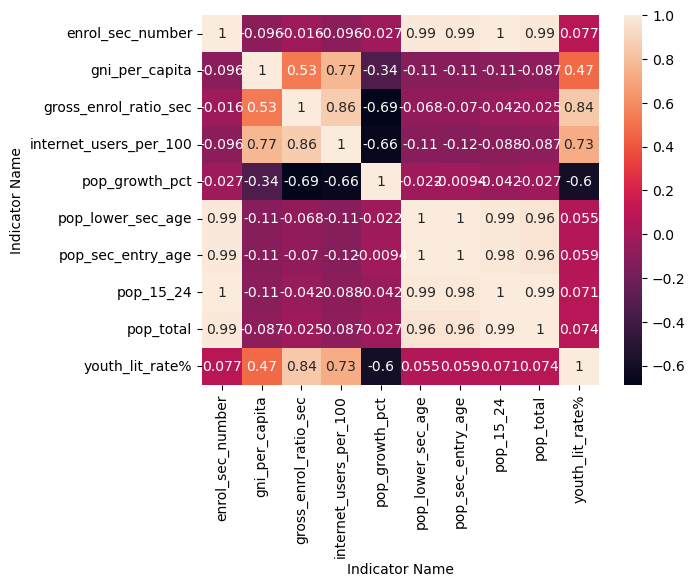

In [396]:
sns.heatmap(pivot_data_by_country_df.drop(columns=["country"]).corr(), annot=True)


Seuls des indicateurs assez faiblement corrélés entre eux doivent être présents (moins de 70% en valeur absolue du coefficient de corrélation que vous choisissez).  
 


#internet_users_per_100 : l y a une corrélation positive entre le GNI per capita et l'utilisation d'internet (0,77). Ce qui signifit que plus la population d'un pays est riche, plus la population à accès à internet  Fortement corrélé avec gross_enrol_ratio_sec (0.86) et gni_per_capita (0.77). Tu peux supprimer internet_users_per_100 si tu préfères garder des variables plus globales.

#enrol_sec_number : Très fortement corrélé (>0.98) avec pop_lower_sec_age, pop_sec_entry_age, pop_15_24 et pop_total. Ces variables représentent des populations proches, donc on peut en garder une seule pour éviter la redondance. --> je conserve pop 15-24 car il s'agit de notre cible 

gross_enrol_ratio_sec : Corrélé avec youth_lit_rate% (0.84) --> on ne garde que gross_enrol_ratio_sec

#Liste des colonnes à conserver

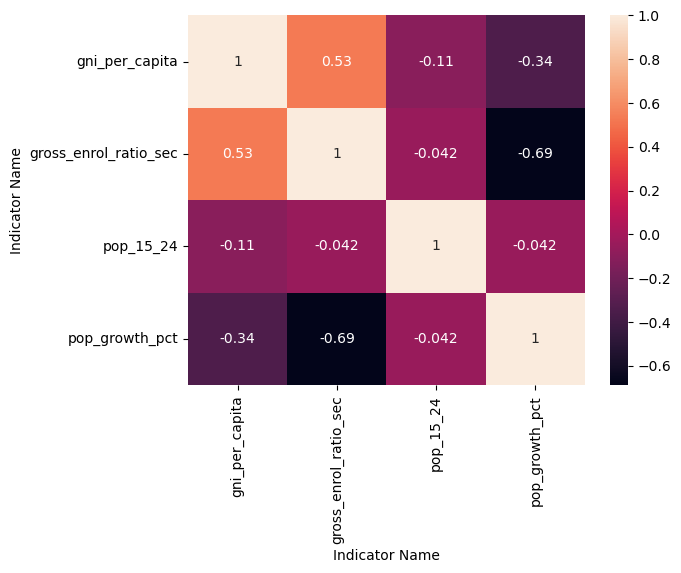

In [404]:
indicators_no_correl= [
    "gni_per_capita",
    "gross_enrol_ratio_sec",
    "pop_15_24", 
    "pop_growth_pct"]

#Je garde ces seules indicateurs dans une nouvelle df

In [465]:
data_non_correl_df= pivot_data_by_country_df[['country']+indicators_no_correl]

In [469]:
data_non_correl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                87 non-null     object 
 1   gni_per_capita         76 non-null     float64
 2   gross_enrol_ratio_sec  71 non-null     float64
 3   pop_15_24              75 non-null     float64
 4   pop_growth_pct         87 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


#Je vérifie la corrélation entre ces indicateurs restants

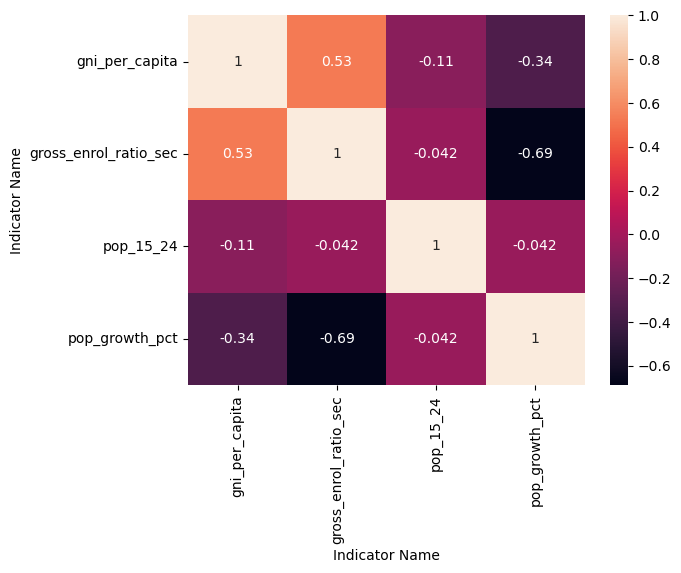

In [436]:
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

#la population n'est pas corrélée aux autres indicateurs (proche de 0)
Tout les indicateurs sont <70%
Pour éviter la redondance et faciliter l’analyse, nous avons conservé uniquement les indicateurs peu corrélés entre eux (corrélation absolue < 0,7). Sont donc retenus :
GNI per capita (revenu moyen par habitant),
Population âgée de 15 à 24 ans (cible principale),
Taux de croissance démographique,
Taux d’alphabétisation des jeunes (15-24 ans).
Cette sélection permet de limiter les variables redondantes tout en conservant des indicateurs pertinents pour notre étude 

### Distribution des indicateurs restants


 Indicateur: gni_per_capita 
 count        76.000000
mean      13538.573553
std       19323.068852
min         261.430000
25%        1487.857500
50%        5669.285000
75%       14177.855000
max      107547.500000
Name: gni_per_capita, dtype: float64 



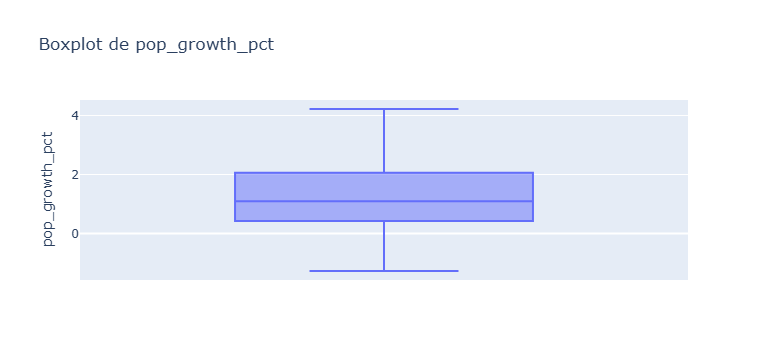

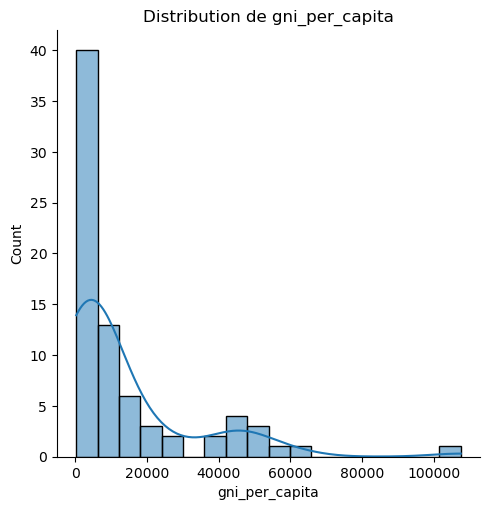


 Indicateur: gross_enrol_ratio_sec 
 count     71.000000
mean      82.774789
std       28.341014
min       17.560000
25%       59.750000
50%       92.630000
75%      101.135000
max      135.750000
Name: gross_enrol_ratio_sec, dtype: float64 



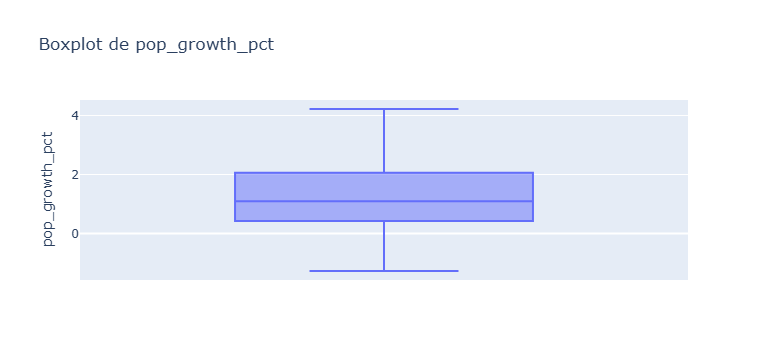

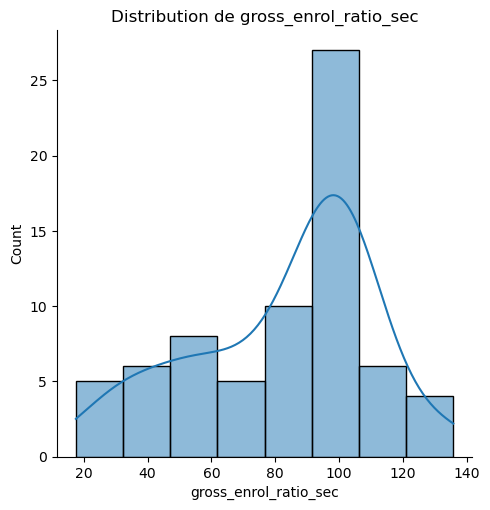


 Indicateur: pop_15_24 
 count    7.500000e+01
mean     9.257476e+06
std      3.648441e+07
min      1.386183e+04
25%      3.817792e+05
50%      1.187388e+06
75%      3.528718e+06
max      2.401628e+08
Name: pop_15_24, dtype: float64 



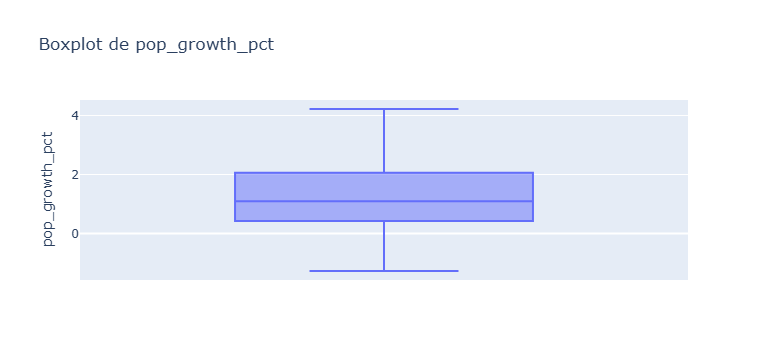

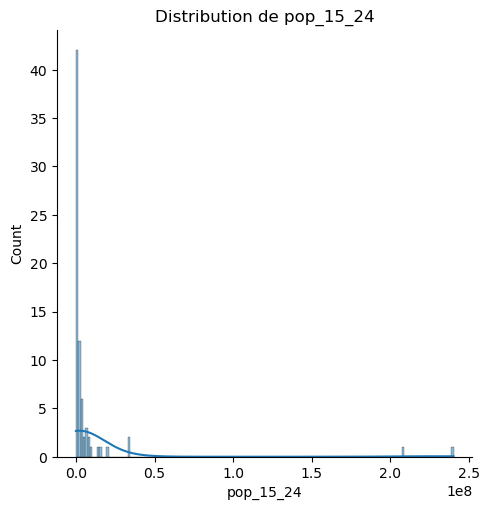


 Indicateur: pop_growth_pct 
 count    87.000000
mean      1.208391
std       1.158794
min      -1.270000
25%       0.435000
50%       1.090000
75%       2.015000
max       4.220000
Name: pop_growth_pct, dtype: float64 



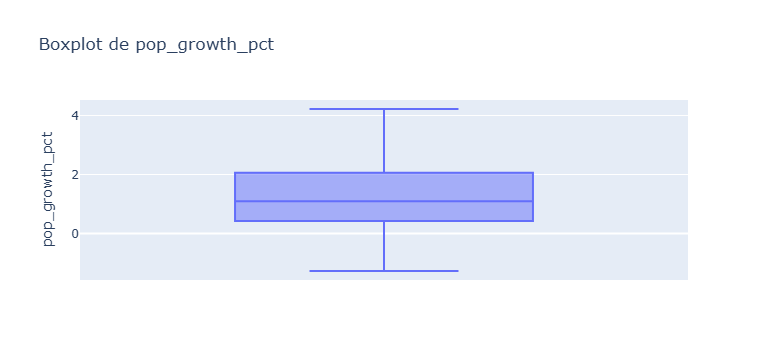

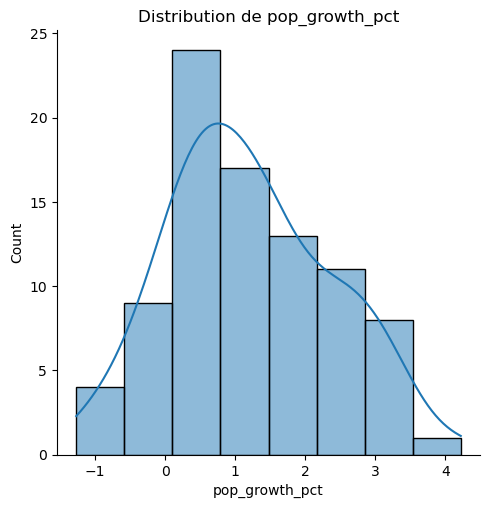

In [689]:
for i in data_non_correl_df.select_dtypes(include='float').columns:
    print("\n Indicateur:",i,"\n",data_non_correl_df[i].describe(),"\n")
         # Boxplot 
    fig = px.box(pivot_data_by_country_df, y=col, title=f"Boxplot de {col}")
    fig.show()
    
    sns.displot(data_non_correl_df[i], kde=True)
    plt.title(f"Distribution de {i}")
    plt.show()

## Etape 2 : Formulation d'une liste de pays pertinant pour l'implantation de academy

##### Dans le df, une ligne correspond à un pays et une colonne à un indicateur. Seuls des indicateurs faiblement corrélés sont présents.

In [471]:
data_non_correl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                87 non-null     object 
 1   gni_per_capita         76 non-null     float64
 2   gross_enrol_ratio_sec  71 non-null     float64
 3   pop_15_24              75 non-null     float64
 4   pop_growth_pct         87 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


### J'observe les top ten pays par indicateurs

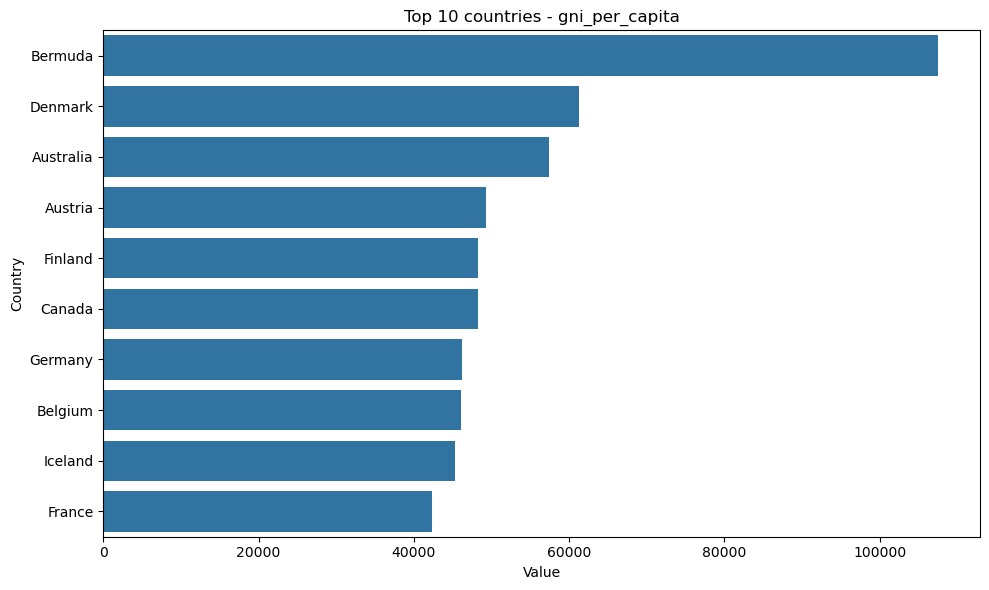

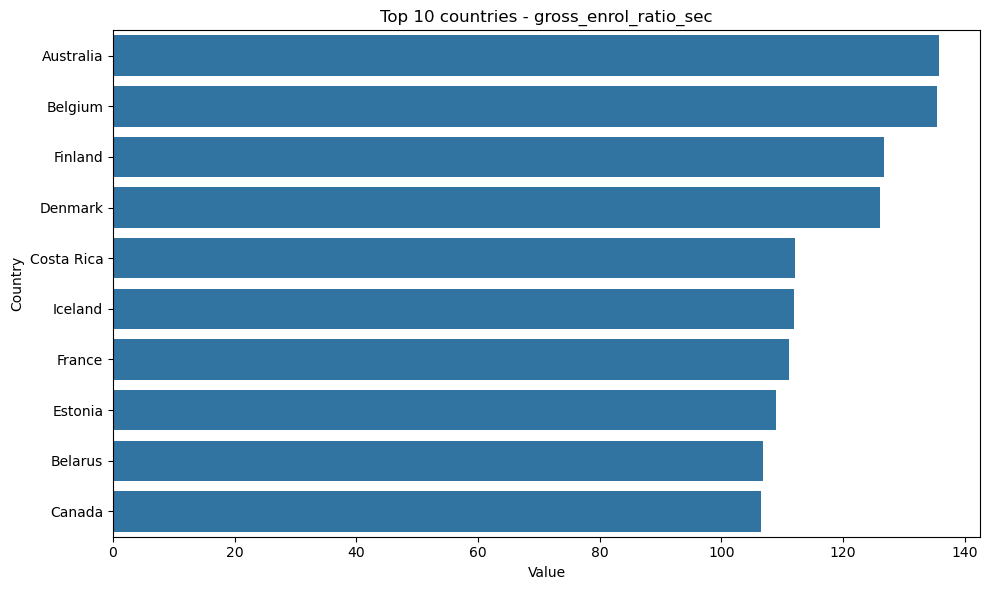

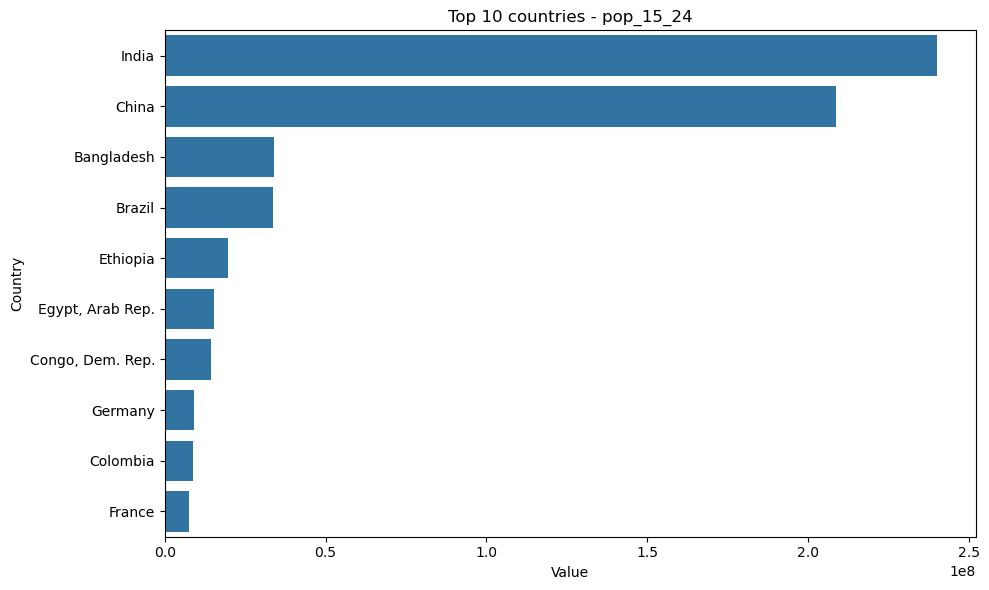

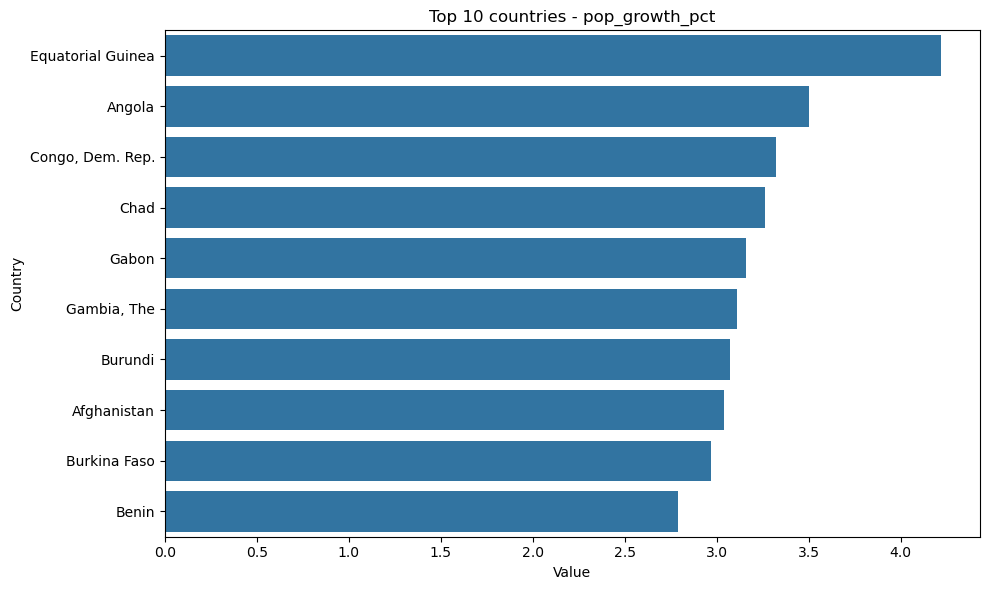

In [487]:
# Étape 1 : création d'une liste pour stocker les pays dans les top 10 par indicateur
top_countries = []

# Pour chaque indicateur (colonne) du dataframe sans corrélation
for col in data_non_correl_df.select_dtypes(include='float').columns:
    top10 = data_non_correl_df.sort_values(by=col, ascending=False).head(10)
    
    # Ajout des pays dans la liste top_countries
    top_countries += top10['country'].tolist()
    
    # Graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10, x=col, y="country")
    plt.title(f"Top 10 countries - {col}")
    plt.xlabel("Value")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

### Je créer une méthode de calcul

#Pour calculer un score global par pays à partir de ces indicateur:   
- je déside de normaliser chaque indicateur, qui ont des échelles différentes : cela les ramenes de 0 à 1
- J'attribue un score à chaque indicateur selon son importance  

#### Normalisation

In [505]:
from sklearn.preprocessing import MinMaxScaler

In [511]:
data_scaled = data_non_correl_df.copy()
data_scaled[indicators_no_correl] = MinMaxScaler().fit_transform(data_scaled[indicators_no_correl])

#### poids selon l'importance :

##### Je crée un dictionnaire qui donne du poids à chaque indicateur.pop_growth_pct est un second indicateur démographique, il a donc un poids moindre.Il est également un indicateur pour le futur. 

In [650]:
poids = {
    "gni_per_capita": 0.4,
    "gross_enrol_ratio_sec": 0.3,
    "pop_15_24": 0.2,
    "pop_growth_pct": 0.1
}

In [652]:
#### Calcul du score pondérés : 

In [653]:
data_scaled['score'] = 0
for col, p in poids.items():
    data_scaled['score'] += data_scaled[col] * p

In [656]:
# 4. Trier par score décroissant
top_countries_by_score = data_scaled.sort_values(by='score', ascending=False)

top10_countries_by_score = top_countries_by_score[['country', 'score']].head(10)
top10_countries_by_score

Indicator Name    country     score
10              Australia  0.566273
52                Denmark  0.536290
18                Belgium  0.507451
65                Finland  0.487127
34                 Canada  0.451283
85                Iceland  0.443301
66                 France  0.432876
11                Austria  0.425348
71                Germany  0.421304
40                  China  0.418047

<Figure size 1200x800 with 0 Axes>

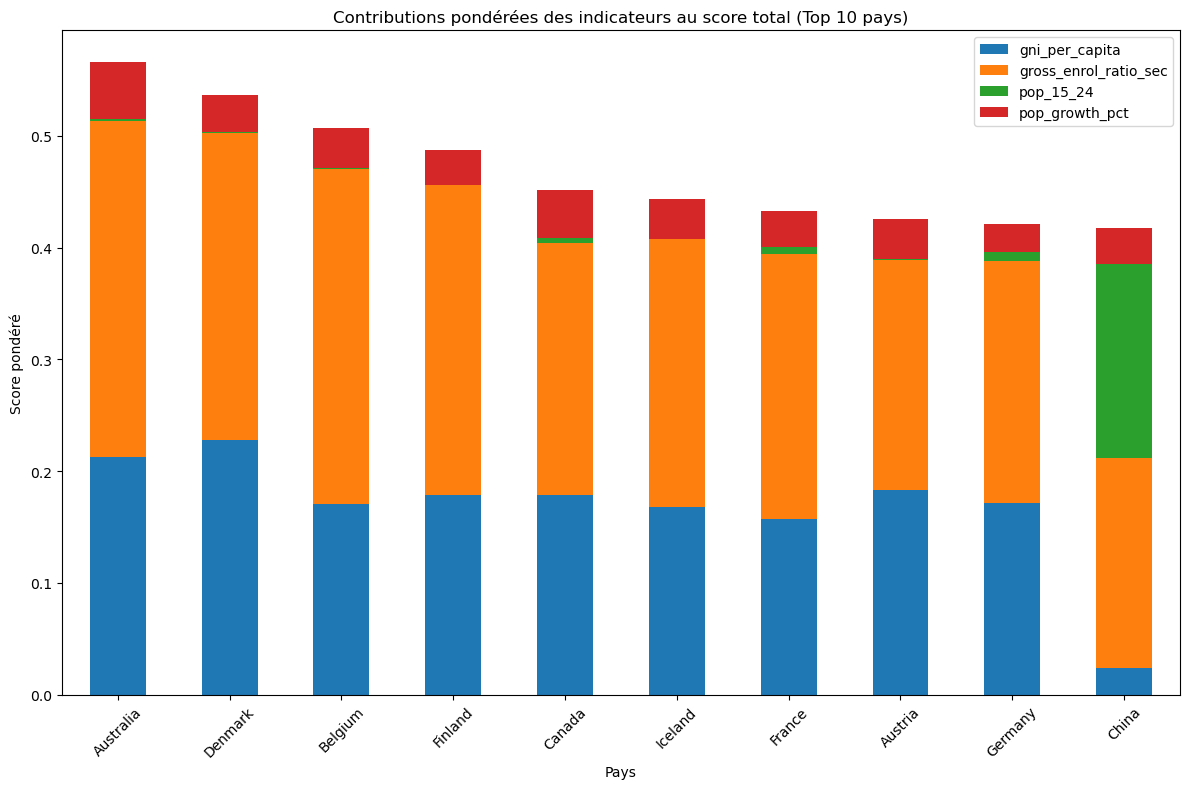

In [658]:
# Création des colonnes pondérées
for col, p in poids.items():
    data_scaled[col + '_weighted'] = data_scaled[col] * p

# Tri par score décroissant
top_countries_by_score = data_scaled.sort_values(by='score', ascending=False)

# Top 10
top_10 = top_countries_by_score.head(10).set_index('country')

# Sélection des colonnes pondérées uniquement
weighted_cols = [col + '_weighted' for col in indicators_no_correl]
indicators_data_weighted = top_10[weighted_cols]
indicators_data_weighted.columns = indicators_no_correl  # pour garder les noms propres

# Graphique empilé des contributions pondérées
plt.figure(figsize=(12, 8))
indicators_data_weighted.plot(kind='bar', stacked=True, rot=45, figsize=(12, 8))

plt.title("Contributions pondérées des indicateurs au score total (Top 10 pays)")
plt.ylabel("Score pondéré")
plt.xlabel("Pays")
plt.tight_layout()
plt.show()

### Maintenant que j'ai mon top 10, je veux observer les informations sur les indicateurs de chacun d'entre eux

In [590]:
# On récupère la liste des pays du top 10
top_10_countries = top_countries_by_score.head(10)['country'].tolist()

# On filtre les données non normalisées pour ces pays
top_10_indicateurs_reels = data_non_correl_df[data_non_correl_df['country'].isin(top_10_countries)]

# On affiche
display(top_10_indicateurs_reels[['country'] + indicators_no_correl])

Indicator Name    country  gni_per_capita  gross_enrol_ratio_sec  \
10              Australia        57400.00                 135.75   
11                Austria        49258.57                  98.85   
18                Belgium        46088.57                 135.55   
34                 Canada        48230.00                 106.50   
40                  China         6551.43                  91.84   
52                Denmark        61268.57                 126.09   
65                Finland        48242.86                 126.73   
66                 France        42401.43                 111.16   
85                Iceland        45358.57                 111.89   
86                  India         1490.00                  69.34   

Indicator Name     pop_15_24  pop_growth_pct  
10              2.921038e+06            1.52  
11              9.896772e+05            0.68  
18              1.254599e+06            0.71  
34              4.452427e+06            1.09  
40              2.087167e+08            0.50  
52              6.943373e+05            0.53  
65              6.497598e+05            0.41  
66              7.582918e+06            0.48  
85              4.481617e+04            0.69  
86              2.401628e+08            1.24

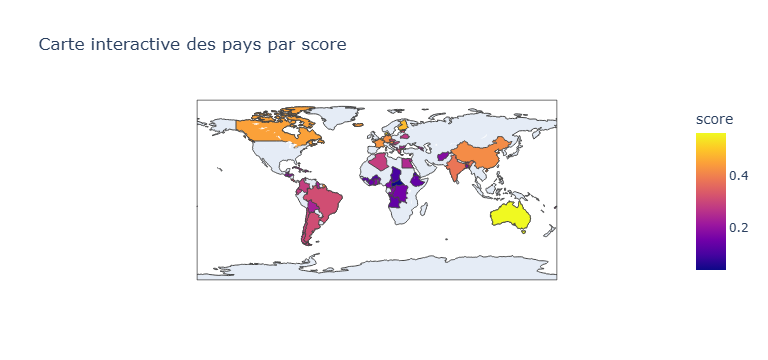

In [710]:
fig = px.choropleth(
    data_scaled,                  # ou pivot_data_by_country_df si le score est là
    locations="country",          # colonne avec les noms des pays
    locationmode="country names", # on utilise les noms pays
    color="score",                # colonne score pour la couleur
    hover_name="country",         # nom du pays au survol
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Carte interactive des pays par score"
)


fig.show()